In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow
from numpy.random import seed

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


***LOADING DATA, PREPROCESSING & EDA***

**Loading**

In [3]:
dataframe = pd.read_csv('/content/drive/MyDrive/Thesis/WA_Fn-UseC_-HR-Employee-Attrition.csv', delimiter = ',', header = 0)

In [4]:
dataframe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
dataframe.shape

(1470, 35)

**Preprocessing**

*Drop the variables that are not going to be used*

In [5]:
#drop the unnecessary variables
dataframe = dataframe.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber', "MonthlyIncome"], axis = 1)

In [ ]:
#check shape to see if they are dropped
print(dataframe.shape)

(1470, 30)


*Checking for missing values per variable and the overall percentage of missing values*

In [ ]:
print(dataframe.isnull().sum())
# finding null values as a percentage
percentage = (dataframe.isnull().sum().sum()/len(dataframe))*100
print('percentage is' + " " + str(percentage) + "%")

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
percentage is 0.0%


*Check Correllation of variables*

Text(0.5, 1.0, 'Correlation Heatmap')

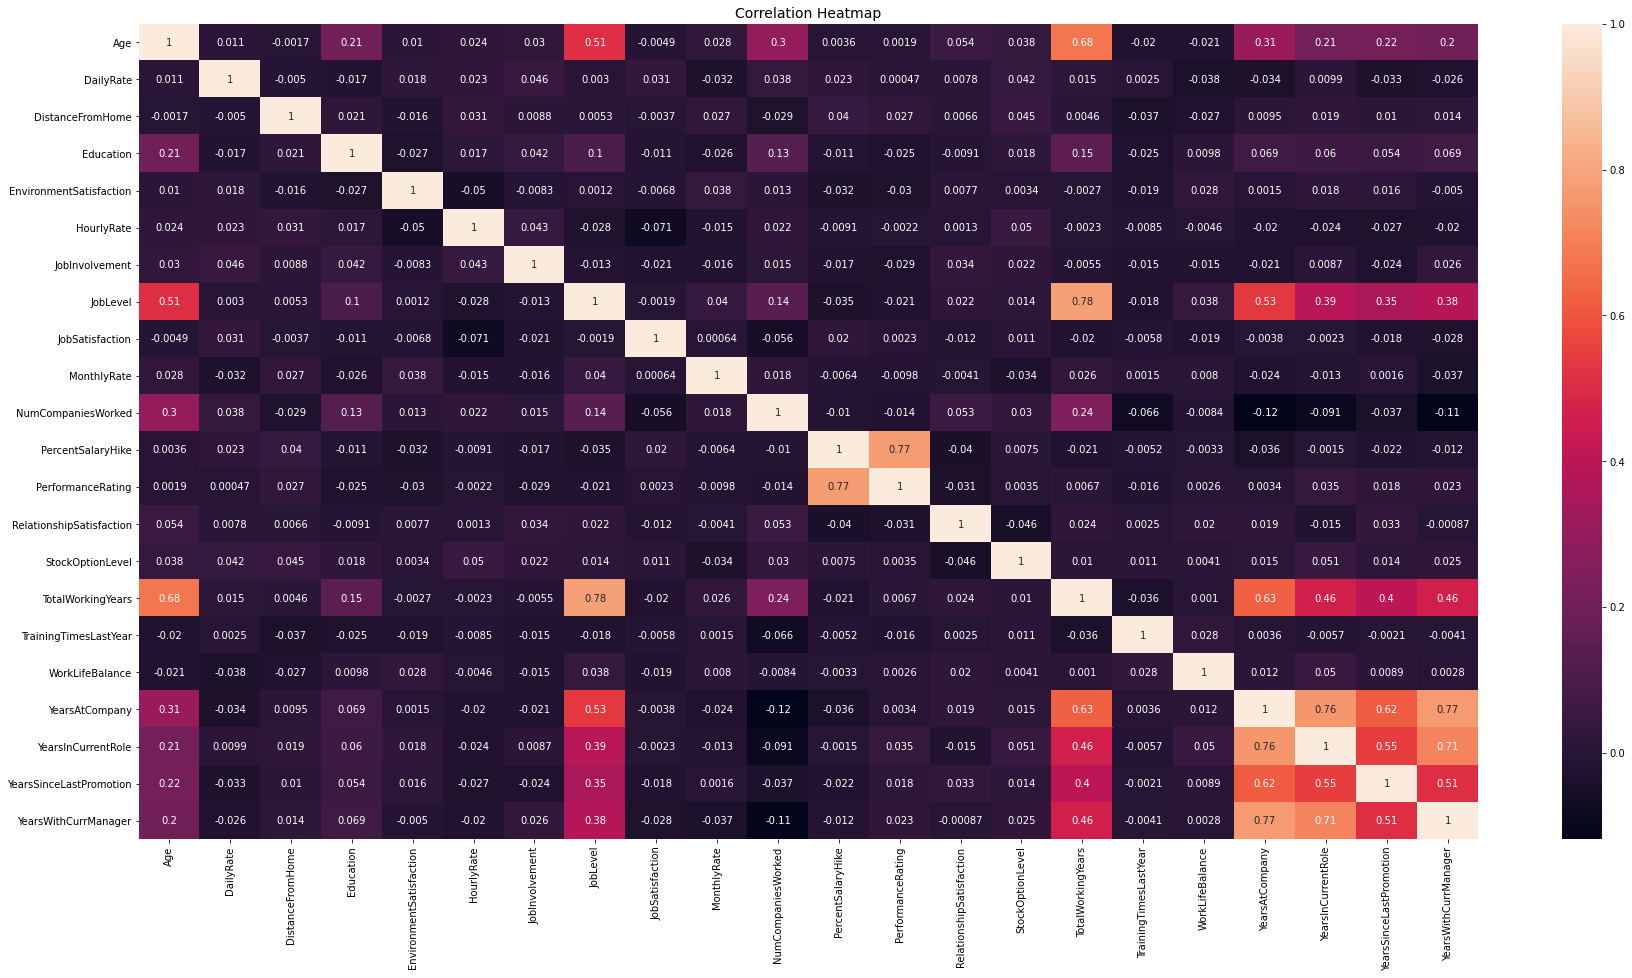

In [ ]:
corr = dataframe.corr()
plt.figure(figsize = (30,15))
heatmap = sns.heatmap(dataframe.corr(),annot= True)
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":14})

***Look for oddities in the data***

In [ ]:
dataframe.describe().T 
 # there are no really weird values in the table

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0


*Check if there are no odd unique values*

In [ ]:
print("Age")
age = dataframe.Age.unique()
print(age)
print("---------------------------------------------------")
print("Attrition")
attrition = dataframe.Attrition.unique()
print(attrition)
print("---------------------------------------------------")
print("BusinessTravel")
businesstravel = dataframe.BusinessTravel.unique()
print(businesstravel)
print("---------------------------------------------------")
print("DailyRate")
dailyrate = dataframe.DailyRate.unique()
print(dailyrate)
print("---------------------------------------------------")
print("Department")
department = dataframe.Department.unique()
print(department)
print("---------------------------------------------------")
print("DistanceFromhome")
distancefromhome = dataframe.DistanceFromHome.unique()
print(distancefromhome)
print("---------------------------------------------------")
print("Education")
education = dataframe.Education.unique()
print(education)
print("---------------------------------------------------")
print("Educationfield")
educationfield = dataframe.EducationField.unique()
print(educationfield)
print("---------------------------------------------------")
print("Environmentsatisfaction")
environmentsatisfaction = dataframe.EnvironmentSatisfaction.unique()
print(environmentsatisfaction)
print("---------------------------------------------------")
print("Gender")
gender = dataframe.Gender.unique()
print(gender)
print("---------------------------------------------------")
print("HourlyRate")
hourlyrate = dataframe.HourlyRate.unique()
print(hourlyrate)
print("---------------------------------------------------")
print("Jobinvolvement")
jobinvolvement = dataframe.JobInvolvement.unique()
print(jobinvolvement)
print("---------------------------------------------------")
print("JobLevel")
joblevel = dataframe.JobLevel.unique()
print(joblevel)
print("---------------------------------------------------")
print("JobRole")
jobrole = dataframe.JobRole.unique()
print(jobrole)
print("---------------------------------------------------")
print("Jobsatisfaction")
jobsatisfaction = dataframe.JobSatisfaction.unique()
print(jobsatisfaction)
print("---------------------------------------------------")
print("Maritalstatus")
maritalstatus = dataframe.MaritalStatus.unique()
print(maritalstatus)
print("---------------------------------------------------")
print("MonthlyRate")
monthlyrate = dataframe.MonthlyRate.unique()
print(monthlyrate)
print("---------------------------------------------------")
print("NumcompaniesWorked")
numcompaniesworked = dataframe.NumCompaniesWorked.unique()
print(numcompaniesworked)
print("---------------------------------------------------")
print('Overtime')
overtime = dataframe.OverTime.unique()
print(overtime)
print("---------------------------------------------------")
print("Percentsalaryhike")
percentsalaryhike = dataframe.PercentSalaryHike.unique()
print(percentsalaryhike)
print("---------------------------------------------------")
print("Performancerating")
performancerating = dataframe.PerformanceRating.unique()
print(performancerating)
print("---------------------------------------------------")
print("Relationshipsatisfaction")
relationshipsatisfaction = dataframe.RelationshipSatisfaction.unique()
print(relationshipsatisfaction)
print("---------------------------------------------------")
print("stockoptionlevel")
stockoptionlevel = dataframe.StockOptionLevel.unique()
print(stockoptionlevel)
print("---------------------------------------------------")
print("Totalworkingyears")
totalworkingyears = dataframe.TotalWorkingYears.unique()
print(totalworkingyears)
print("---------------------------------------------------")
print("Trainingtimeslastyear")
trainingtimeslastyear = dataframe.TrainingTimesLastYear.unique()
print(trainingtimeslastyear)
print("---------------------------------------------------")
print("Worklifebalance")
worklifebalance = dataframe.WorkLifeBalance.unique()
print(worklifebalance)
print("---------------------------------------------------")
print("yearsatcompany")
yearsatcompany = dataframe.YearsAtCompany.unique()
print(yearsatcompany)
print("---------------------------------------------------")
print("yearsincurrentrole")
yearsincurrentrole = dataframe.YearsInCurrentRole.unique()
print(yearsincurrentrole)
print("---------------------------------------------------")
print("yearssincelastpromotion")
yearssincelastpromotion = dataframe.YearsSinceLastPromotion.unique()
print(yearssincelastpromotion)
print("---------------------------------------------------")
print("yearswithcurrentmanager")
yearswithcurrentmanager = dataframe.YearsWithCurrManager.unique()
print(yearswithcurrentmanager)


Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
---------------------------------------------------
Attrition
['Yes' 'No']
---------------------------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
---------------------------------------------------
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750 

*Create boxplots to check for outliers*

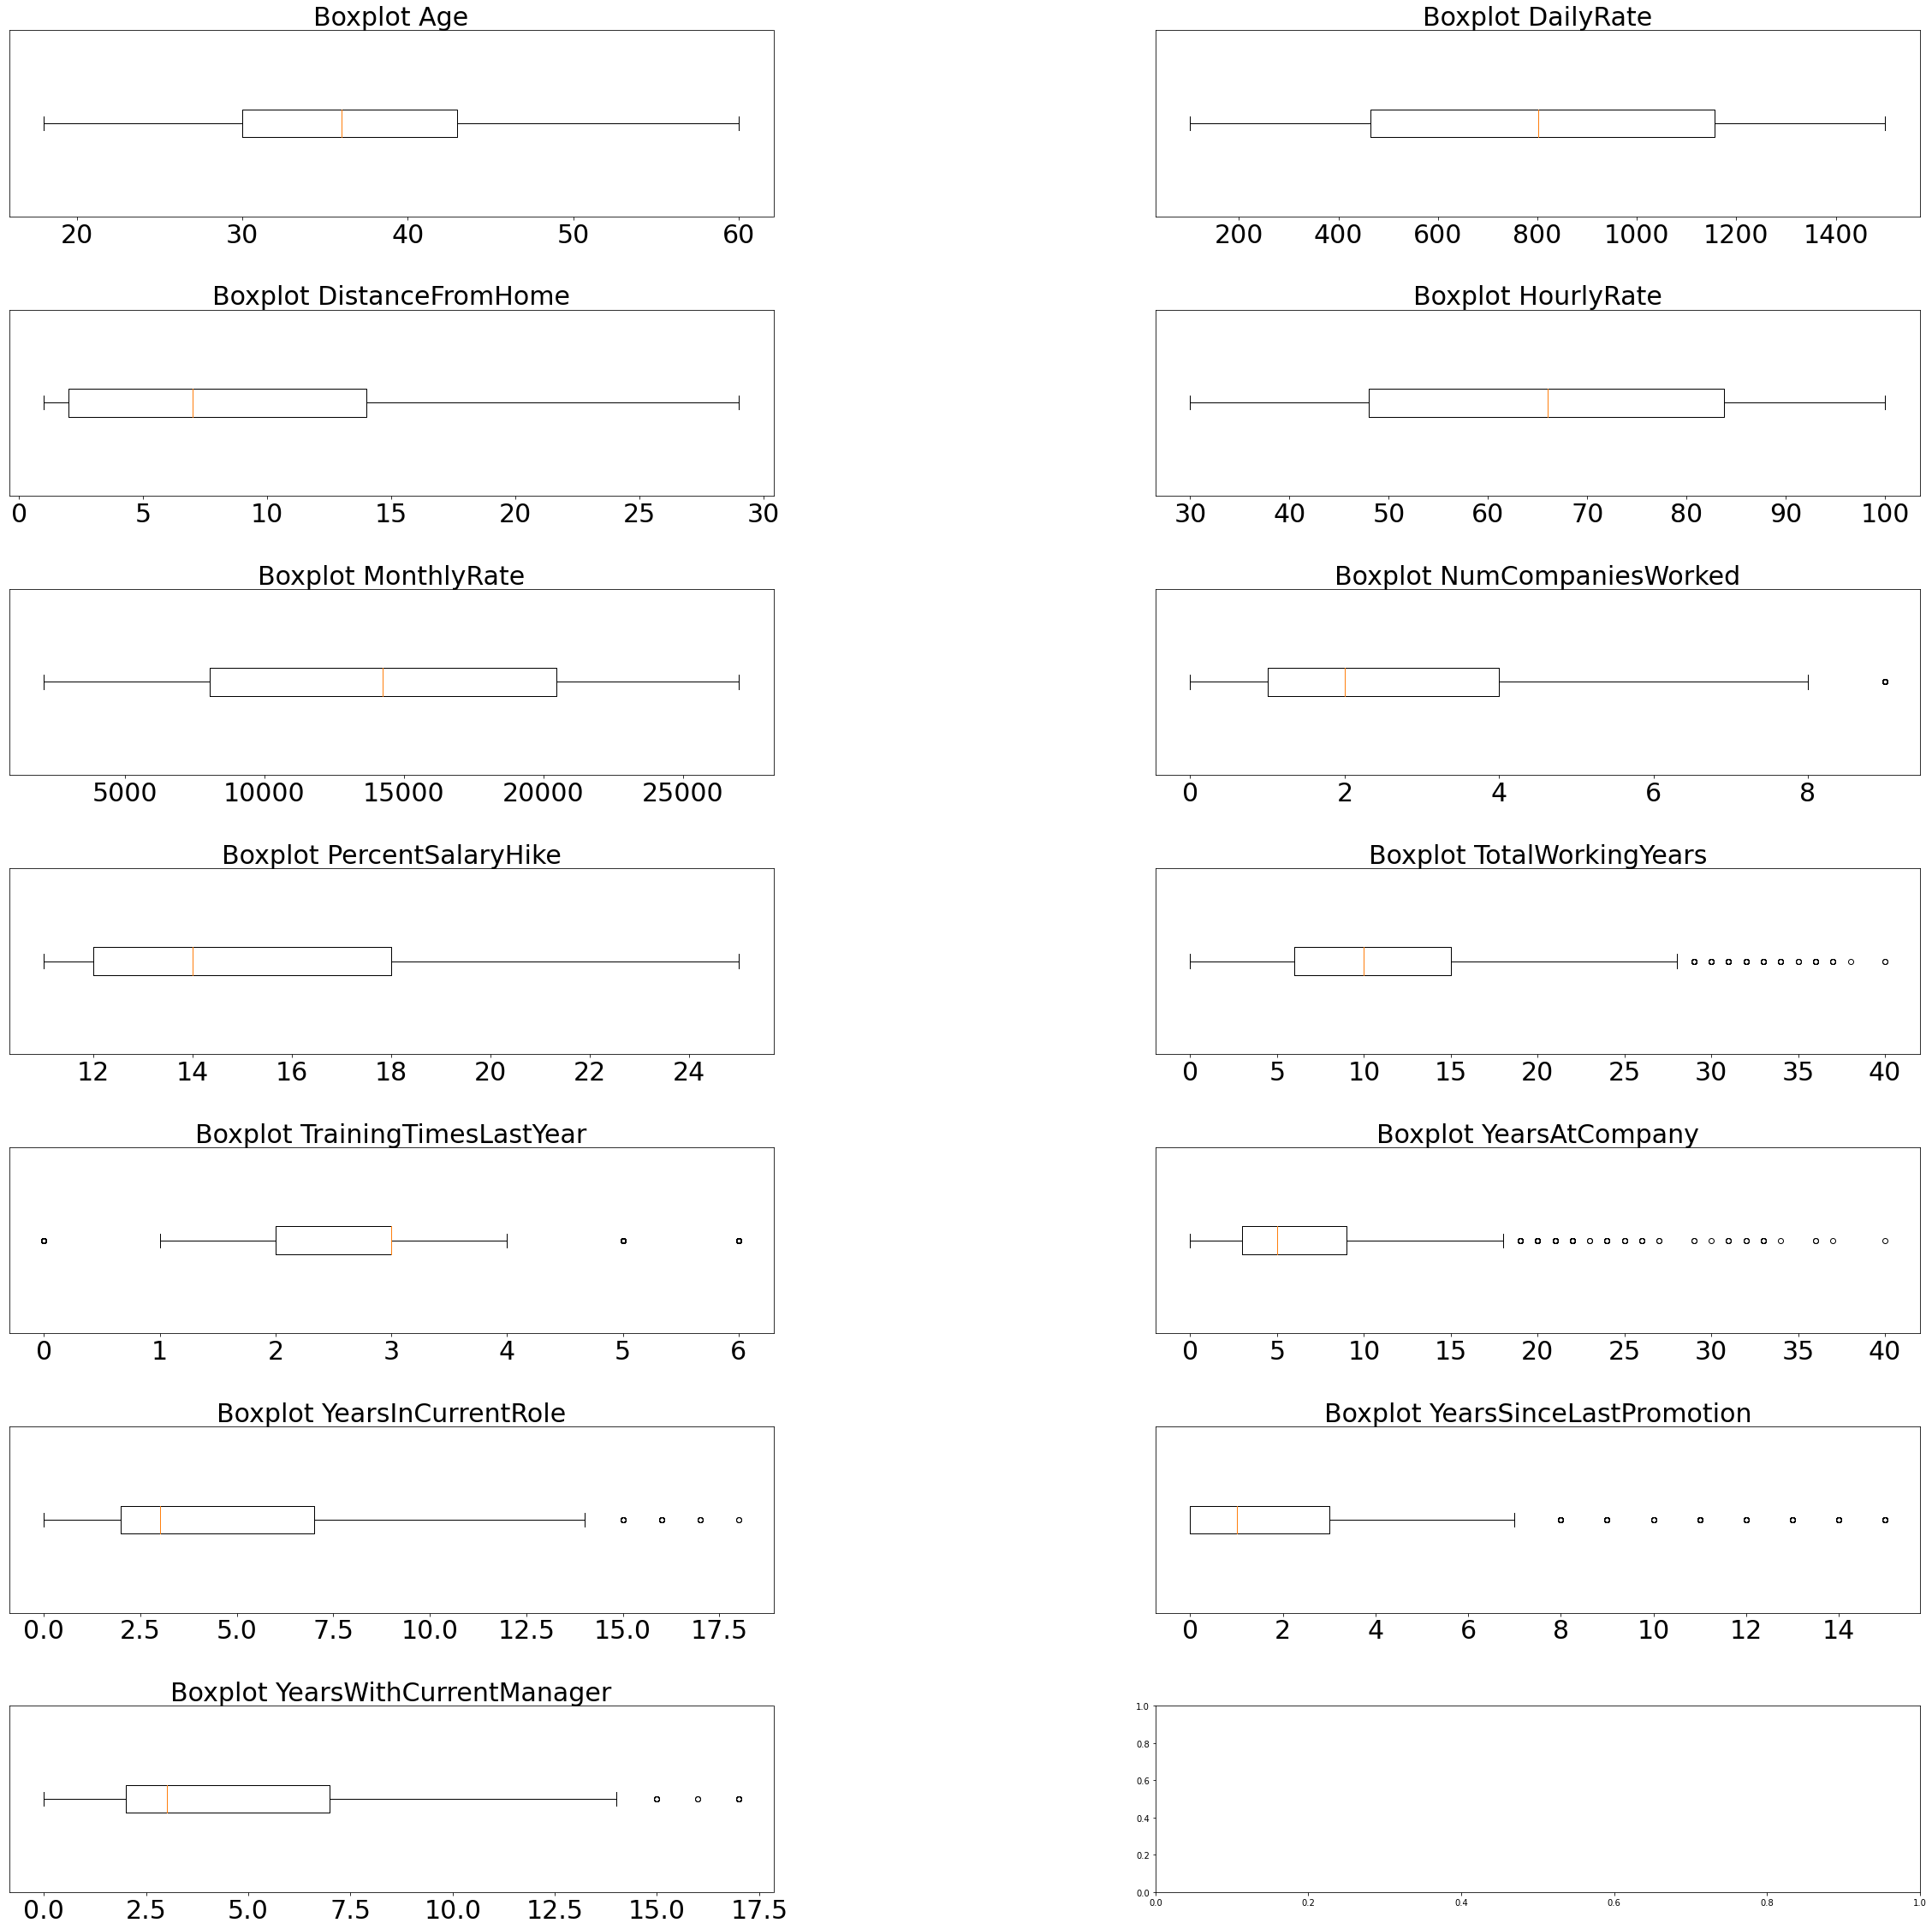

In [ ]:
fig, axs = plt.subplots(7,2, figsize = (40,40))
axs[0,0].boxplot(dataframe["Age"], vert = False)
axs[0,0].set_title("Boxplot Age", size = 30)
axs[0,0].set_yticks([])
axs[0,0].tick_params(axis='x',  labelsize= 30)
axs[0,1].boxplot(dataframe["DailyRate"], vert = False)
axs[0,1].set_title("Boxplot DailyRate", size = 30)
axs[0,1].set_yticks([])
axs[0,1].tick_params(axis='x',  labelsize= 30)
axs[1,0].boxplot(dataframe["DistanceFromHome"], vert = False)
axs[1,0].set_title("Boxplot DistanceFromHome", size = 30)
axs[1,0].set_yticks([])
axs[1,0].tick_params(axis='x',  labelsize= 30)
axs[1,1].boxplot(dataframe["HourlyRate"], vert = False)
axs[1,1].set_title("Boxplot HourlyRate", size = 30)
axs[1,1].set_yticks([])
axs[1,1].tick_params(axis='x',  labelsize= 30)
axs[2,0].boxplot(dataframe["MonthlyRate"], vert = False)
axs[2,0].set_title("Boxplot MonthlyRate", size = 30)
axs[2,0].set_yticks([])
axs[2,0].tick_params(axis='x',  labelsize= 30)
axs[2,1].boxplot(dataframe["NumCompaniesWorked"], vert = False)
axs[2,1].set_title("Boxplot NumCompaniesWorked", size = 30)
axs[2,1].set_yticks([])
axs[2,1].tick_params(axis='x',  labelsize= 30)
axs[3,0].boxplot(dataframe["PercentSalaryHike"], vert = False)
axs[3,0].set_title("Boxplot PercentSalaryHike", size = 30)
axs[3,0].set_yticks([])
axs[3,0].tick_params(axis='x',  labelsize= 30)
axs[3,1].boxplot(dataframe["TotalWorkingYears"], vert = False)
axs[3,1].set_title("Boxplot TotalWorkingYears", size = 30)
axs[3,1].set_yticks([])
axs[3,1].tick_params(axis='x',  labelsize= 30)
axs[4,0].boxplot(dataframe["TrainingTimesLastYear"], vert = False)
axs[4,0].set_title("Boxplot TrainingTimesLastYear", size = 30)
axs[4,0].set_yticks([])
axs[4,0].tick_params(axis='x',  labelsize= 30)
axs[4,1].boxplot(dataframe["YearsAtCompany"], vert = False)
axs[4,1].set_title("Boxplot YearsAtCompany", size = 30)
axs[4,1].set_yticks([])
axs[4,1].tick_params(axis='x',  labelsize= 30)
axs[5,0].boxplot(dataframe["YearsInCurrentRole"], vert = False)
axs[5,0].set_title("Boxplot YearsInCurrentRole", size = 30)
axs[5,0].set_yticks([])
axs[5,0].tick_params(axis='x',  labelsize= 30)
axs[5,1].boxplot(dataframe["YearsSinceLastPromotion"], vert = False)
axs[5,1].set_title("Boxplot YearsSinceLastPromotion", size = 30)
axs[5,1].set_yticks([])
axs[5,1].tick_params(axis='x',  labelsize= 30)
axs[6,0].boxplot(dataframe["YearsWithCurrManager"], vert = False)
axs[6,0].set_title("Boxplot YearsWithCurrentManager", size = 30)
axs[6,0].set_yticks([])
axs[6,0].tick_params(axis='x',  labelsize= 30)
fig.subplots_adjust(wspace = 0.5, hspace= 0.5)

#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/Boxplots.jpg")

In [ ]:
dataframe.loc[dataframe['TotalWorkingYears'] == 40]
#here although 40 might seem as an outlier it makes sense since the persons are 58. Therefore this outlier is not changed or removed

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,4,Female,94,3,3,Healthcare Representative,4,Married,3465,1,No,12,3,4,1,40,3,2,40,10,15,6
595,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,4,Male,31,3,5,Research Director,2,Single,25761,7,Yes,12,3,4,0,40,2,3,31,15,13,8


In [ ]:
dataframe.loc[dataframe['YearsWithCurrManager'] == 15]
#here although long again these people are relatively old and work quite some time for the company

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
123,51,No,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,Male,51,3,5,Research Director,3,Single,6462,7,No,13,3,3,0,23,5,3,20,18,15,15
153,45,No,Travel_Rarely,194,Research & Development,9,3,Life Sciences,2,Male,60,3,2,Laboratory Technician,2,Divorced,10901,8,No,18,3,3,1,20,2,1,17,9,0,15
187,55,No,Travel_Rarely,692,Research & Development,14,4,Medical,3,Male,61,4,5,Research Director,2,Single,13339,8,No,11,3,4,0,36,3,3,24,15,2,15
231,42,No,Travel_Rarely,532,Research & Development,4,2,Technical Degree,3,Male,58,3,5,Manager,4,Married,4933,1,No,11,3,4,0,22,3,3,22,17,11,15
635,35,No,Travel_Rarely,607,Research & Development,9,3,Life Sciences,4,Female,66,2,3,Manufacturing Director,3,Married,23457,1,Yes,20,4,2,1,17,2,3,17,14,5,15


In [ ]:
#Conclusion regarding outliers: values are left as they are since they are reasonable values and not likely to be an entry mistake

***Look at distribution of some variables related to dependent variable***

No     1233
Yes     237
Name: Attrition, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Attrition')

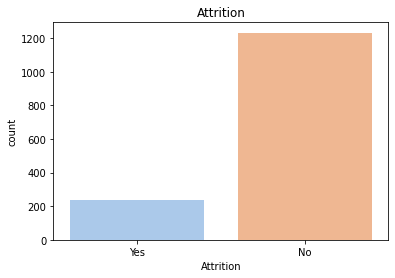

In [ ]:
#Attrition, dependent variable distribution
print(dataframe.Attrition.value_counts())
sns.countplot(dataframe['Attrition'], palette = "pastel")
plt.title("Attrition")

Male      882
Female    588
Name: Gender, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender')

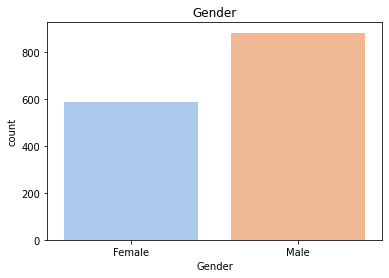

In [ ]:
#Gender
print(dataframe.Gender.value_counts())
sns.countplot(dataframe["Gender"], palette = "pastel")
plt.title("Gender")

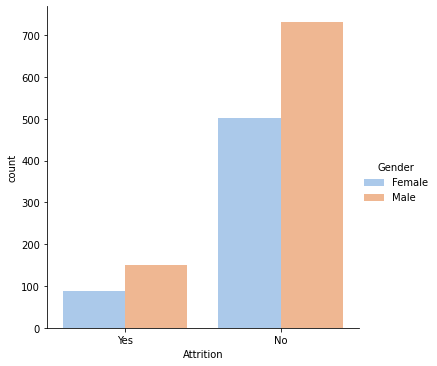

In [ ]:
sns.catplot(x = 'Attrition', hue = "Gender", kind = 'count', data = dataframe, palette= "pastel")
#the distribution is equally. Since men are a bit overrepresented it makes sense that they have higher bars. But as well in yes and no the distribution of men and women is somewhat the same

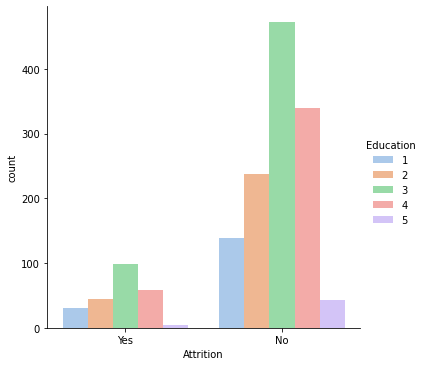

In [ ]:
#Educationlevel
sns.catplot(x="Attrition", hue = "Education", kind = 'count', data = dataframe, palette= "pastel")
#same distribution sort of for yes and no attrition

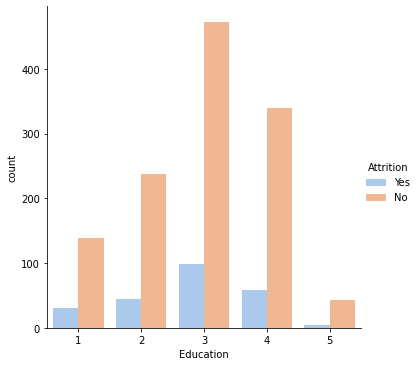

In [ ]:
sns.catplot(x="Education", hue = "Attrition", kind = 'count', data = dataframe, palette= "pastel")

In [ ]:
dataframe.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

**Create X and Y**

In [6]:
#create the Y variable
dataframe_new = dataframe.copy()
Y = dataframe.Attrition

In [7]:
labelencoder = LabelEncoder()
Y_numeric = labelencoder.fit_transform(Y)


In [ ]:
Counter(Y), Counter(Y_numeric) # check if labels still the same distibuted

(Counter({'No': 1233, 'Yes': 237}), Counter({0: 1233, 1: 237}))

In [8]:
# create a dataframe with only the input variables 
dataframe_new.drop('Attrition', axis = 1, inplace = True)

In [9]:
X = dataframe_new

In [ ]:
print(X.shape)

(1470, 29)


In [ ]:
X.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager

In [10]:
#greate dummy variables, so that the categorical variables are one-hot encoded
X_final = pd.get_dummies(X)
X_final.shape

(1470, 50)

In [ ]:
X_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_final.shape, Y.shape, Y_numeric.shape

((1470, 50), (1470,), (1470,))

**Applying SMOTE**

applying SMOTE to Y_numeric

In [ ]:
## creating equal classes by applying SMOTE
smote = SMOTE(sampling_strategy= 'minority',  random_state= 666)
X_smote, Y_smote = smote.fit_resample(X_final, Y_numeric)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(Y_numeric), Counter(Y_smote)

(Counter({0: 1233, 1: 237}), Counter({0: 1233, 1: 1233}))

In [ ]:
X_smote.shape, Y_smote.shape

((2466, 50), (2466,))

**Splitting data in train and test**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_numeric, test_size = 0.2, random_state = 666, stratify = Y_numeric)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 50) (1176,)
(294, 50) (294,)


In [ ]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_smote, Y_smote, test_size = 0.2, random_state = 666, stratify = Y_smote)

In [ ]:
print(X_sm_train.shape, y_sm_train.shape)
print(X_sm_test.shape, y_sm_test.shape)

(1972, 50) (1972,)
(494, 50) (494,)


**Not normalized data to verify results of A&J**

In [14]:
X_train_not_norm = X_train
X_test_not_norm = X_test

**Normalizing the X data for SMOTE and original data**

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_sm_train = scaler.transform(X_sm_train)
#X_sm_test = scaler.transform(X_sm_test)
#normalization is applied because some algorithms are impacted by the scale of variables ( Ajit & Punnoose, 2016)

**MODELS ON ORIGINAL DATA**

*KNN*

In [ ]:
random.seed(666)
KNN = KNeighborsClassifier()
param_grid= {'n_neighbors': [3,5,7,9,11,13,15,17,19]}
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_knn = GridSearchCV(KNN, param_grid, cv = 10, scoring = metrics, refit = 'f1', return_train_score= True)

In [ ]:
random.seed(666)
gscv_knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
scores_KNN = pd.DataFrame(gscv_knn.cv_results_)
meanscores_knn = scores_KNN[['params',"mean_test_accuracy", 'mean_train_accuracy','mean_test_f1', 'mean_train_f1','mean_test_recall', 'mean_train_recall',
                             'mean_test_precision', "mean_train_precision","mean_test_roc_auc", 'mean_train_roc_auc', 
                           'rank_test_accuracy', 'rank_test_f1', 'rank_test_recall', 'rank_test_precision', 'rank_test_roc_auc']]
meanscores_knn.T

,0,1,2,3,4,5,6,7,8
params,{'n_neighbors': 3},{'n_neighbors': 5},{'n_neighbors': 7},{'n_neighbors': 9},{'n_neighbors': 11},{'n_neighbors': 13},{'n_neighbors': 15},{'n_neighbors': 17},{'n_neighbors': 19}
mean_test_accuracy,0.835014,0.853759,0.847784,0.853738,0.856258,0.849478,0.850326,0.848617,0.850319
mean_train_accuracy,0.900983,0.879535,0.87311,0.866119,0.8613,0.858938,0.856009,0.854497,0.853741
mean_test_f1,0.328784,0.329503,0.234973,0.243701,0.221694,0.165791,0.160165,0.140641,0.150641
mean_train_f1,0.62104,0.478699,0.410632,0.348239,0.28963,0.256374,0.222827,0.202337,0.192268
mean_test_recall,0.252632,0.226316,0.152632,0.152632,0.136842,0.1,0.0947368,0.0842105,0.0894737
mean_train_recall,0.502339,0.34269,0.274269,0.221637,0.175439,0.150877,0.12807,0.11462,0.108187
mean_test_precision,0.49637,0.644167,0.571111,0.663095,0.758333,0.627381,0.65,0.5,0.6
mean_train_precision,0.814138,0.795313,0.822545,0.81529,0.839097,0.865761,0.869796,0.8808,0.886254
mean_test_roc_auc,0.700136,0.72222,0.736247,0.747265,0.752661,0.751071,0.749464,0.753946,0.757743


In [ ]:
gscv_knn.best_params_

{'n_neighbors': 5}

In [ ]:
gscv_knn.best_score_

0.3295025979073955

In [ ]:
#prediction with the best model
KNN_pred = gscv_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, KNN_pred))
knn_cm = confusion_matrix(y_test, KNN_pred)
print(knn_cm)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.50      0.21      0.30        47

    accuracy                           0.84       294
   macro avg       0.68      0.59      0.60       294
weighted avg       0.81      0.84      0.81       294

[[237  10]
 [ 37  10]]


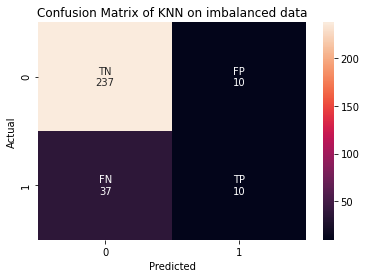

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in knn_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of KNN on imbalanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM KNN Imbalanced.jpg")
plt.show()



In [ ]:
evaluation_scores_KNN = {}
evaluation_scores_KNN["Accuracy"] = round(accuracy_score(y_test, KNN_pred),3)
evaluation_scores_KNN["F1"] = round(f1_score(y_test,KNN_pred),3)
evaluation_scores_KNN["Precision"] = round(precision_score(y_test, KNN_pred),3)
evaluation_scores_KNN["Recall"] = round(recall_score(y_test, KNN_pred),3)
print(evaluation_scores_KNN)

{'Accuracy': 0.84, 'F1': 0.299, 'Precision': 0.5, 'Recall': 0.213}


In [ ]:
#here you can indeed see that although accuracy is high, f1 is relatively low.
# 37 values are predicted negative while they were positive, so here you can see the tendency to ignore the minority class(positive) and predict negative.

KNN on not normalized data to verify A&J's result

In [20]:
random.seed(666)
KNN_not = KNeighborsClassifier()
param_grid= {'n_neighbors': [3,5,7,9,11,13,15,17,19]}
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_knn_not = GridSearchCV(KNN_not, param_grid, cv = 10, scoring = metrics, refit = 'f1', return_train_score= True)

In [22]:
random.seed(666)
gscv_knn_not.fit(X_train_not_norm, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [24]:
gscv_knn_not.best_params_

{'n_neighbors': 3}

In [25]:
gscv_knn_not.best_score_

0.14858518690554284

In [27]:
KNN_pred_not = gscv_knn_not.predict(X_test_not_norm)

In [29]:
print(classification_report(y_test, KNN_pred_not))
knn_not_cm = confusion_matrix(y_test, KNN_pred_not)
print(knn_not_cm)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       247
           1       0.33      0.13      0.18        47

    accuracy                           0.82       294
   macro avg       0.59      0.54      0.54       294
weighted avg       0.77      0.82      0.78       294

[[235  12]
 [ 41   6]]


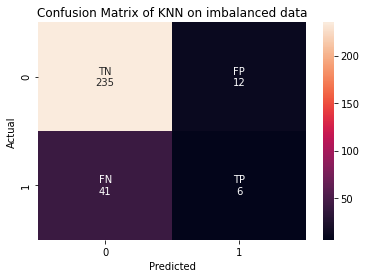

In [32]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in knn_not_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_not_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of KNN on imbalanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM KNN not normalized Imbalanced.jpg")
plt.show()

In [33]:
evaluation_scores_KNN_not = {}
evaluation_scores_KNN_not["Accuracy"] = round(accuracy_score(y_test, KNN_pred_not),3)
evaluation_scores_KNN_not["F1"] = round(f1_score(y_test,KNN_pred_not),3)
evaluation_scores_KNN_not["Precision"] = round(precision_score(y_test, KNN_pred_not),3)
evaluation_scores_KNN_not["Recall"] = round(recall_score(y_test, KNN_pred_not),3)
print(evaluation_scores_KNN_not)

{'Accuracy': 0.82, 'F1': 0.185, 'Precision': 0.333, 'Recall': 0.128}


*SVM*

*Parameter tuning SVM*

In [ ]:
SVM = svm.SVC(random_state= 666)
param_grid= {"C":[0.001, 0.01, 0.1, 1,10],
             "kernel": ["linear","poly", "rbf", "sigmoid"],
             "degree": [2,3],
             "gamma": [0.001, 0.01, 0.1, 1,10]}
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_svm = GridSearchCV(SVM, param_grid, cv = 10, scoring = metrics, refit = 'f1', return_train_score= True)

In [ ]:
random.seed(666)
gscv_svm.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272:

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=666, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
scores_SVM = pd.DataFrame(gscv_svm.cv_results_)
meanscores_SVM = scores_SVM[['params',"mean_test_accuracy", 'mean_train_accuracy','mean_test_f1', 'mean_train_f1','mean_test_recall', 'mean_train_recall',
                             'mean_test_precision', "mean_train_precision","mean_test_roc_auc", 'mean_train_roc_auc', 
                           'rank_test_accuracy', 'rank_test_f1', 'rank_test_recall', 'rank_test_precision', 'rank_test_roc_auc']]
meanscores_SVM.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
params,"{'C': 0.001, 'degree': 2, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 2, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 2, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 2, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 3, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 3, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 3, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 3, 'gamma': 10, 'kernel...",...,"{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': '...","{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': '...","{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': '...","{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': '...","{'C': 10, 'degree': 2, 'gamma': 10, 'kernel': ...","{'C': 10, 'degree': 2, 'gamma': 10, 'kernel': ...","{'C': 10, 'degree': 2, 'gamma': 10, 'kernel': ...","{'C': 10, 'degree': 2, 'gamma': 10, 'kernel': ...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 3

In [ ]:
gscv_svm.best_params_

{'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
gscv_svm.best_score_

0.5142381866519797

In [ ]:
#prediction with the best model
SVM_pred = gscv_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, SVM_pred))
svm_cm = confusion_matrix(y_test, SVM_pred)
print(svm_cm)

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       247
           1       0.76      0.40      0.53        47

    accuracy                           0.88       294
   macro avg       0.83      0.69      0.73       294
weighted avg       0.87      0.88      0.87       294

[[241   6]
 [ 28  19]]


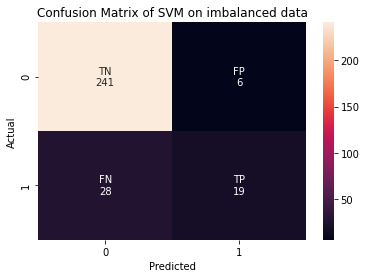

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in svm_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of SVM on imbalanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM SVM Imbalanced.jpg")
plt.show()

In [ ]:
evaluation_scores_SVM = {}
evaluation_scores_SVM["Accuracy"] = round(accuracy_score(y_test, SVM_pred),3)
evaluation_scores_SVM["F1"] = round(f1_score(y_test,SVM_pred),3)
evaluation_scores_SVM["Precision"] = round(precision_score(y_test, SVM_pred),3)
evaluation_scores_SVM["Recall"] = round(recall_score(y_test, SVM_pred),3)
print(evaluation_scores_SVM)

{'Accuracy': 0.884, 'F1': 0.528, 'Precision': 0.76, 'Recall': 0.404}


Check Linear seperately to see if the above result is correct:

*Linear SVM*

In [ ]:
SVM_linear = svm.SVC(kernel = 'linear', random_state= 666)
param_grid= {"C":[0.001, 0.01, 0.1, 1,10]}
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_svm_linear = GridSearchCV(SVM_linear, param_grid, cv = 10, scoring = metrics, refit = 'f1', return_train_score= True)

In [ ]:
random.seed(666)
gscv_svm_linear.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=666, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
scores_SVM_linear = pd.DataFrame(gscv_svm_linear.cv_results_)
meanscores_SVM_linear = scores_SVM_linear[['params',"mean_test_accuracy", 'mean_train_accuracy','mean_test_f1', 'mean_train_f1','mean_test_recall', 'mean_train_recall',
                             'mean_test_precision', "mean_train_precision","mean_test_roc_auc", 'mean_train_roc_auc', 
                           'rank_test_accuracy', 'rank_test_f1', 'rank_test_recall', 'rank_test_precision', 'rank_test_roc_auc']]
meanscores_SVM_linear.T

,0,1,2,3,4
params,{'C': 0.001},{'C': 0.01},{'C': 0.1},{'C': 1},{'C': 10}
mean_test_accuracy,0.838433,0.838433,0.862256,0.878393,0.87244
mean_train_accuracy,0.838435,0.838435,0.865835,0.892857,0.893896
mean_test_f1,0,0,0.266261,0.514238,0.508543
mean_train_f1,0,0,0.293596,0.569188,0.58721
mean_test_recall,0,0,0.157895,0.4,0.410526
mean_train_recall,0,0,0.174854,0.438596,0.467251
mean_test_precision,0,0,0.966667,0.751672,0.697781
mean_train_precision,0,0,0.969339,0.811731,0.790875
mean_test_roc_auc,0.851724,0.85023,0.850069,0.85806,0.852929


In [ ]:
gscv_svm_linear.best_params_

{'C': 1}

In [ ]:
gscv_svm_linear.best_score_

0.5142381866519797

In [ ]:
SVM_linear_pred = gscv_svm_linear.predict(X_test)

In [ ]:
print(classification_report(y_test, SVM_linear_pred))
svm_linear_cm = confusion_matrix(y_test, SVM_linear_pred)
print(svm_linear_cm)

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       247
           1       0.76      0.40      0.53        47

    accuracy                           0.88       294
   macro avg       0.83      0.69      0.73       294
weighted avg       0.87      0.88      0.87       294

[[241   6]
 [ 28  19]]


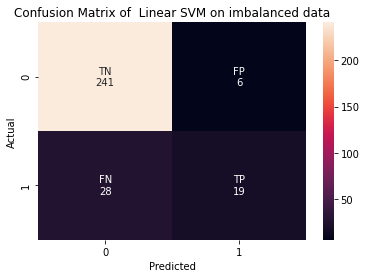

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in svm_linear_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_linear_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of  Linear SVM on imbalanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
evaluation_scores_SVM_linear = {}
evaluation_scores_SVM_linear["Accuracy"] = round(accuracy_score(y_test, SVM_linear_pred),3)
evaluation_scores_SVM_linear["F1"] = round(f1_score(y_test,SVM_linear_pred),3)
evaluation_scores_SVM_linear["Precision"] = round(precision_score(y_test, SVM_linear_pred),3)
evaluation_scores_SVM_linear["Recall"] = round(recall_score(y_test, SVM_linear_pred),3)
print(evaluation_scores_SVM_linear)

{'Accuracy': 0.884, 'F1': 0.528, 'Precision': 0.76, 'Recall': 0.404}


*Random Forest*

In [ ]:
RF = RandomForestClassifier(random_state= 666)
param_grid= {'n_estimators': [10,20,50,100,200],
             'max_depth': [5,10,15,20,25,30],
             "max_features": [5,6,7,8,9]} 
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_rf = GridSearchCV(RF, param_grid, cv = 10, scoring = metrics , refit = 'f1', return_train_score= True)
gscv_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=666,
                                

In [ ]:
scores_RF = pd.DataFrame(gscv_rf.cv_results_)
meanscores_RF= scores_RF[['params',"mean_test_accuracy", 'mean_train_accuracy','mean_test_f1', 'mean_train_f1','mean_test_recall', 'mean_train_recall',
                             'mean_test_precision', "mean_train_precision","mean_test_roc_auc", 'mean_train_roc_auc', 
                           'rank_test_accuracy', 'rank_test_f1', 'rank_test_recall', 'rank_test_precision', 'rank_test_roc_auc']]
meanscores_RF.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
params,"{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...",...,"{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 8, 'n_estima...","{'max_depth': 30, 'ma

In [ ]:
gscv_rf.best_params_

{'max_depth': 10, 'max_features': 8, 'n_estimators': 10}

In [ ]:
gscv_rf.best_score_

0.34015905295215637

In [ ]:
#prediction with the best model
RF_pred = gscv_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, RF_pred))
rf_cm = confusion_matrix(y_test, RF_pred)
print(rf_cm)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.61      0.23      0.34        47

    accuracy                           0.85       294
   macro avg       0.74      0.60      0.63       294
weighted avg       0.83      0.85      0.83       294

[[240   7]
 [ 36  11]]


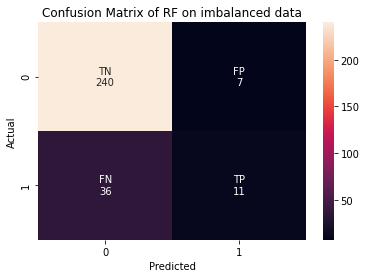

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in rf_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of RF on imbalanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM RF Imbalanced.jpg")
plt.show()

In [ ]:
evaluation_scores_RF = {}
evaluation_scores_RF["Accuracy"] = round(accuracy_score(y_test, RF_pred),3)
evaluation_scores_RF["F1"] = round(f1_score(y_test,RF_pred),3)
evaluation_scores_RF["Precision"] = round(precision_score(y_test, RF_pred),3)
evaluation_scores_RF["Recall"] = round(recall_score(y_test, RF_pred),3)
print(evaluation_scores_RF)

{'Accuracy': 0.854, 'F1': 0.338, 'Precision': 0.611, 'Recall': 0.234}


In [ ]:
#here you can once again see that although accuracy is high, f1 is relatively low.
# 40 values are predicted negative while they were positive, so here you can see the tendency to ignore the minority class(positive) and predict negative.
# F1 and Accuracy somewhat the same as Alduayj & Rajpoot 2016

*Feed Forward Neural Network With One Hidden Layer*

In [ ]:
def create_nn_imbalanced(optimizer = "adam", hidden_nodes = 15):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
	# create the empty model
  model = Sequential()
  model.add(Dense(hidden_nodes, activation= 'relu'))
  model.add(Dense(1, activation='sigmoid')) #last activation function is sigmoid because of binary classification
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) #binary crossentropy because of binary classification
  return model

Focus only on number of hidden neurons first

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN1 = KerasClassifier(build_fn=create_nn_imbalanced, verbose=0)
# define the grid search parameters
#hidden_nodes = is best inbetween the size of the input layer and output layer 2/3 often or something less
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32],
              'epochs':[15] , 'hidden_nodes': list(range(15,34)),
              'optimizer':['adam']}
gscv_nn1 = GridSearchCV(estimator= NN1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb835901ed0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn1.best_params_)
print(gscv_nn1.best_score_) #best model

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'optimizer': 'adam'}
0.4102225150051238


Try with batch size 64

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN1_1 = KerasClassifier(build_fn=create_nn_imbalanced, verbose=0)
# define the grid search parameters
#batch_size = [32,64,128] chosen because it is often a multiplication of 32
#epochs = [5,10,15]
#hidden_nodes = is best inbetween the size of the input layer and output layer 2/3 often or something less
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64],
              'epochs':[15] , 'hidden_nodes': list(range(15,34)),
              'optimizer':['adam']}
gscv_nn1_1 = GridSearchCV(estimator= NN1_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn1_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb8359257d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn1_1.best_params_)
print(gscv_nn1_1.best_score_)
#not better than batch size 32

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 33, 'optimizer': 'adam'}
0.32292519560463473


Try with batch size 128

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN1_2 = KerasClassifier(build_fn=create_nn_imbalanced, verbose=0)
# define the grid search parameters
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[128],
              'epochs':[15] , 'hidden_nodes':list(range(15,34)),
              'optimizer':['adam']}
gscv_nn1_2 = GridSearchCV(estimator= NN1_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn1_2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb830fd6f50>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [128], 'epochs': [15],
                         'hidden_nodes': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn1_2.best_params_)
print(gscv_nn1_2.best_score_)
#not better than first approach withbatch size 32

{'batch_size': 128, 'epochs': 15, 'hidden_nodes': 22, 'optimizer': 'adam'}
0.15250005697676985


*Feed Forward Neural Network With Two Hidden Layers*

In [ ]:
def create_nn_imbalanced_2(optimizer = "adam", hidden_nodes = 33, hidden_nodes_2 = 16):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
  #create the empty model
  model = Sequential()
  model.add(Dense(hidden_nodes, activation= 'relu'))
  model.add(Dense(hidden_nodes_2, activation = 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  #compile model
  model.compile(loss= 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

Focus on number of hidden nodes in second hidden layer

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_2_1 = KerasClassifier(build_fn=create_nn_imbalanced_2, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], #based on best cross validated score with 1 hidden layer
              'epochs':[15] , 
              'hidden_nodes':[24], #based on best cross validated score with 1 hidden layer
              'hidden_nodes_2':list(range(3,25)), #same or lower in the hidden layer
              'optimizer':['adam']}
gscv_nn2_1 = GridSearchCV(estimator= NN_2_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn2_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb8318b2410>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24],
                         'hidden_nodes_2': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                            14, 15, 16, 17, 18, 19, 20, 21, 22,
                                            23, 24],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn2_1.best_params_)
print(gscv_nn2_1.best_score_) #Better than best model with one hidden layer.

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 8, 'optimizer': 'adam'}
0.4705776628492476


Try batch size 64

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_2_2 = KerasClassifier(build_fn=create_nn_imbalanced_2, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], 
              'epochs':[15] , 
              'hidden_nodes':[24], #based on best cross validated score with 1 hidden layer
              'hidden_nodes_2':list(range(3,25)),
              'optimizer':['adam']}
gscv_nn2_2 = GridSearchCV(estimator= NN_2_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn2_2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb82eec4d50>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24],
                         'hidden_nodes_2': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                            14, 15, 16, 17, 18, 19, 20, 21, 22,
                                            23, 24],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn2_2.best_params_)
print(gscv_nn2_2.best_score_) #not better than best model NN_2_1

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 19, 'optimizer': 'adam'}
0.44698142104704874


Try batch size 128

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_2_3 = KerasClassifier(build_fn=create_nn_imbalanced_2, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[128], 
              'epochs':[15] , 
              'hidden_nodes':[24], #based on best cross validated score with 1 hidden layer
              'hidden_nodes_2':list(range(3,25)),
              'optimizer':['adam']}
gscv_nn2_3 = GridSearchCV(estimator= NN_2_3, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn2_3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb82ed0b490>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [128], 'epochs': [15],
                         'hidden_nodes': [24],
                         'hidden_nodes_2': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                            14, 15, 16, 17, 18, 19, 20, 21, 22,
                                            23, 24],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn2_3.best_params_)
print(gscv_nn2_3.best_score_) #not better than best model NN_2_1

{'batch_size': 128, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 9, 'optimizer': 'adam'}
0.3670109641034467


Try different sizes for the first hidden nodes

In [ ]:
#the second hidden layer will be now between 8 and 24 included because these are the values that pop out as best unitl now and second layer should be smaller than first hidden layer

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_2_4 = KerasClassifier(build_fn=create_nn_imbalanced_2, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], #based on best cross validated score with 1 hidden layer
              'epochs':[15] , 
              'hidden_nodes':[24,25,26,27,28,29,30,31,32,33], 
              'hidden_nodes_2': list(range(8,25)),
              'optimizer':['adam']}
gscv_nn2_4 = GridSearchCV(estimator= NN_2_4, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn2_4.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb82f9a7750>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33],
                         'hidden_nodes_2': [8, 9, 10, 11, 12, 13, 14, 15, 16,
                                            17, 18, 19, 20, 21, 22, 23, 24],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn2_4.best_params_)
print(gscv_nn2_4.best_score_)  #new best model

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 26, 'hidden_nodes_2': 23, 'optimizer': 'adam'}
0.4908587935761849


Try different batch size (64) with new best hidden_nodes and hidden_nodes_2

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_2_5 = KerasClassifier(build_fn=create_nn_imbalanced_2, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], 
              'epochs':[15] , 
              'hidden_nodes':[26], 
              'hidden_nodes_2': [23],
              'optimizer':['adam']}
gscv_nn2_5 = GridSearchCV(estimator= NN_2_5, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn2_5.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb830d2e750>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [26], 'hidden_nodes_2': [23],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn2_5.best_params_)
print(gscv_nn2_5.best_score_) #new best model

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 26, 'hidden_nodes_2': 23, 'optimizer': 'adam'}
0.4936145659402271


Batch size 128 for new best hidden nodes

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_2_6 = KerasClassifier(build_fn=create_nn_imbalanced_2, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[128], 
              'epochs':[15] , 
              'hidden_nodes':[26], 
              'hidden_nodes_2': [23],
              'optimizer':['adam']}
gscv_nn2_6 = GridSearchCV(estimator= NN_2_6, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn2_6.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb82f993d10>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [128], 'epochs': [15],
                         'hidden_nodes': [26], 'hidden_nodes_2': [23],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn2_6.best_params_)
print(gscv_nn2_6.best_score_) #does not perform better

{'batch_size': 128, 'epochs': 15, 'hidden_nodes': 26, 'hidden_nodes_2': 23, 'optimizer': 'adam'}
0.3406124122444159


Feed Forward Neural Network With Three Hidden Layers

In [ ]:
def create_nn_imbalanced_3(optimizer = "adam", hidden_nodes = 33, hidden_nodes_2 = 26, hidden_nodes_3 = 9):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
  #create the empty model
  model = Sequential()
  model.add(Dense(hidden_nodes, activation= 'relu'))
  model.add(Dense(hidden_nodes_2, activation = 'relu'))
  model.add(Dense(hidden_nodes_3, activation = 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  #compile model
  model.compile(loss= 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

Now focus first only on hidden nodes

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_3_1 = KerasClassifier(build_fn=create_nn_imbalanced_3, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32,64], #because 32 came once out at best with one hidden layer and 64 came once out as best with two hidden layers
              'epochs':[15] , 
              'hidden_nodes':[24,26,33], #came out as best in the other experiments
              'hidden_nodes_2':[23],
              'hidden_nodes_3':[6,9,12,15,17,19,21,23], #should be smaller or equal than the layer before
              'optimizer':['adam']}
gscv_nn3_1 = GridSearchCV(estimator= NN_3_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn3_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb830a99b10>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'epochs': [15],
                         'hidden_nodes': [24, 26, 33], 'hidden_nodes_2': [23],
                         'hidden_nodes_3': [6, 9, 12, 15, 17, 19, 21, 23],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn3_1.best_params_)
print(gscv_nn3_1.best_score_) #better than 2 hidden layer nn

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 26, 'hidden_nodes_2': 23, 'hidden_nodes_3': 12, 'optimizer': 'adam'}
0.5069920931602484


Test if there are better options for the second layer hidden nodes

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_3_2 = KerasClassifier(build_fn=create_nn_imbalanced_3, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], #because 32 came once out at best with one hidden layer and 64 came once out as best wit two hidden layers
              'epochs':[15] , 
              'hidden_nodes':[24,26,33], #came out as best in the other experiments
              'hidden_nodes_2':[19,21,23,25],
              'hidden_nodes_3':[6,9,12,15,17,19,21,23], #should be smaller or equal than the layer before
              'optimizer':['adam']}
gscv_nn3_2 = GridSearchCV(estimator= NN_3_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn3_2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb8308063d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24, 26, 33],
                         'hidden_nodes_2': [19, 21, 23, 25],
                         'hidden_nodes_3': [6, 9, 12, 15, 17, 19, 21, 23],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn3_2.best_params_)
print(gscv_nn3_2.best_score_)  #not better than basic tryout

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 26, 'hidden_nodes_2': 25, 'hidden_nodes_3': 17, 'optimizer': 'adam'}
0.49701963223380796


Try with batch size 64 because it also came out as best

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_3_3 = KerasClassifier(build_fn=create_nn_imbalanced_3, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], #because 32 came once out at best with one hidden layer and 64 came once out as best wit two hidden layers
              'epochs':[15] , 
              'hidden_nodes':[24,26,33], #came out as best in the other experiments
              'hidden_nodes_2':[19,21,23,25],
              'hidden_nodes_3':[6,9,12,15,17,19,21,23], #should be smaller or equal than the layer before
              'optimizer':['adam']}
gscv_nn3_3 = GridSearchCV(estimator= NN_3_3, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn3_3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09c6809ed0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24, 26, 33],
                         'hidden_nodes_2': [19, 21, 23, 25],
                         'hidden_nodes_3': [6, 9, 12, 15, 17, 19, 21, 23],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn3_3.best_params_)
print(gscv_nn3_3.best_score_)  #best model overall

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 26, 'hidden_nodes_2': 25, 'hidden_nodes_3': 15, 'optimizer': 'adam'}
0.512141953051944


Jump to 5 hidden layers to see if it makes a difference

In [ ]:
def create_nn_imbalanced_5 (optimizer = 'adam', hidden_nodes = 33, hidden_nodes_2 = 23, hidden_nodes_3 = 12, hidden_nodes_4 = 3, hidden_nodes_5 = 3):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
  model = Sequential()
  model.add(Dense(hidden_nodes, activation = 'relu'))
  model.add(Dense(hidden_nodes_2, activation = 'relu'))
  model.add(Dense(hidden_nodes_3, activation = 'relu'))
  model.add(Dense(hidden_nodes_4, activation = 'relu'))
  model.add(Dense(hidden_nodes_5, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  #compile model
  model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_5_1 = KerasClassifier(build_fn=create_nn_imbalanced_5, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64],
              'epochs':[15] , 
              'hidden_nodes':[24,26,33], #came out as best options
              'hidden_nodes_2':[23,25], #came out as best in previous tryouts
              'hidden_nodes_3':[12,15], #came out as best options in previous tryouts
              'hidden_nodes_4': [6,9,12],
              'hidden_nodes_5': [6,9,12],
              'optimizer':['adam']}
gscv_nn_5_1 = GridSearchCV(estimator= NN_5_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_5_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb830188250>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24, 26, 33],
                         'hidden_nodes_2': [23, 25], 'hidden_nodes_3': [12, 15],
                         'hidden_nodes_4': [6, 9, 12],
                         'hidden_nodes_5': [6, 9, 12], 'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_5_1.best_params_)
print(gscv_nn_5_1.best_score_) #not better than 3 layer, also weird that second node larger is than first node

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 25, 'hidden_nodes_3': 12, 'hidden_nodes_4': 9, 'hidden_nodes_5': 9, 'optimizer': 'adam'}
0.5095622933547724


Try with batch size 32

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_5_2 = KerasClassifier(build_fn=create_nn_imbalanced_5, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32],
              'epochs':[15] , 
              'hidden_nodes':[24,26,33], #came out as best options
              'hidden_nodes_2':[23,25], #came out as best in previous tryouts
              'hidden_nodes_3':[12,15], #came out as best options in previous tryouts
              'hidden_nodes_4': [9,12],
              'hidden_nodes_5': [9,12],
              'optimizer':['adam']}
gscv_nn_5_2 = GridSearchCV(estimator= NN_5_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_5_2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb82f9d6ed0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24, 26, 33],
                         'hidden_nodes_2': [23, 25], 'hidden_nodes_3': [12, 15],
                         'hidden_nodes_4': [9, 12], 'hidden_nodes_5': [9, 12],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_5_2.best_params_)
print(gscv_nn_5_2.best_score_) #not better

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 23, 'hidden_nodes_3': 15, 'hidden_nodes_4': 12, 'hidden_nodes_5': 9, 'optimizer': 'adam'}
0.497771033800109


Try with batch size 64 and other hidden_nodes 4 en 5

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_5_3 = KerasClassifier(build_fn=create_nn_imbalanced_5, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64],
              'epochs':[15] , 
              'hidden_nodes':[24], #came out as best option in the model above
              'hidden_nodes_2':[23], #came out as best option in the model above
              'hidden_nodes_3':[15], #came out as best option in the model above
              'hidden_nodes_4': [3,6,9,12,15],
              'hidden_nodes_5': [3,6,9],
              'optimizer':['adam']}
gscv_nn_5_3 = GridSearchCV(estimator= NN_5_3, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_5_3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb82473e650>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24], 'hidden_nodes_2': [23],
                         'hidden_nodes_3': [15],
                         'hidden_nodes_4': [3, 6, 9, 12, 15],
                         'hidden_nodes_5': [3, 6, 9], 'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_5_3.best_params_)
print(gscv_nn_5_3.best_score_)

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 23, 'hidden_nodes_3': 15, 'hidden_nodes_4': 12, 'hidden_nodes_5': 9, 'optimizer': 'adam'}
0.4919260523114479


Try something complete different to see if it makes a difference

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_5_4 = KerasClassifier(build_fn=create_nn_imbalanced_5, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64],
              'epochs':[15] , 
              'hidden_nodes':[33], 
              'hidden_nodes_2':[27], 
              'hidden_nodes_3':[18], 
              'hidden_nodes_4': [3,6,9,12,15],
              'hidden_nodes_5': [3,6,9,12],
              'optimizer':['adam']}
gscv_nn_5_4 = GridSearchCV(estimator= NN_5_4, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_5_4.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb824738790>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [33], 'hidden_nodes_2': [27],
                         'hidden_nodes_3': [18],
                         'hidden_nodes_4': [3, 6, 9, 12, 15],
                         'hidden_nodes_5': [3, 6, 9, 12],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_5_4.best_params_)
print(gscv_nn_5_4.best_score_) #not better tham 3 layer model

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 33, 'hidden_nodes_2': 27, 'hidden_nodes_3': 18, 'hidden_nodes_4': 6, 'hidden_nodes_5': 3, 'optimizer': 'adam'}
0.5016417774958396


Jump back to 4 hidden layer model to see if it performs better 

In [ ]:
def create_nn_imbalanced_4 (optimizer = 'adam', hidden_nodes = 33, hidden_nodes_2 = 23, hidden_nodes_3 = 12, hidden_nodes_4 = 3):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
  model = Sequential()
  model.add(Dense(hidden_nodes, activation = 'relu'))
  model.add(Dense(hidden_nodes_2, activation = 'relu'))
  model.add(Dense(hidden_nodes_3, activation = 'relu'))
  model.add(Dense(hidden_nodes_4, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  #compile model
  model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_4_1 = KerasClassifier(build_fn=create_nn_imbalanced_4, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64],
              'epochs':[15] , 
              'hidden_nodes':[24,26,33], #came out as best options
              'hidden_nodes_2':[23,25], #came out as best in previous tryouts
              'hidden_nodes_3':[12,15], #came out as best options in previous tryouts
              'hidden_nodes_4': [3,6,9,12],
              'optimizer':['adam']}
gscv_nn_4_1 = GridSearchCV(estimator= NN_4_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_4_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc9ddd0a3d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24, 26, 33],
                         'hidden_nodes_2': [23, 25], 'hidden_nodes_3': [12, 15],
                         'hidden_nodes_4': [3, 6, 9, 12],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_4_1.best_params_)
print(gscv_nn_4_1.best_score_) #not better

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 26, 'hidden_nodes_2': 25, 'hidden_nodes_3': 12, 'hidden_nodes_4': 3, 'optimizer': 'adam'}
0.5055344178338198


Try with batch size 32

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_4_2 = KerasClassifier(build_fn=create_nn_imbalanced_4, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32],
              'epochs':[15] , 
              'hidden_nodes':[24,26,33], #came out as best options
              'hidden_nodes_2':[23,25], #came out as best in previous tryouts
              'hidden_nodes_3':[12,15], #came out as best options in previous tryouts
              'hidden_nodes_4': [3,6,9,12],
              'optimizer':['adam']}
gscv_nn_4_2 = GridSearchCV(estimator= NN_4_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_4_2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc9dde12b50>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24, 26, 33],
                         'hidden_nodes_2': [23, 25], 'hidden_nodes_3': [12, 15],
                         'hidden_nodes_4': [3, 6, 9, 12],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_4_2.best_params_)
print(gscv_nn_4_2.best_score_) #not better

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 26, 'hidden_nodes_2': 25, 'hidden_nodes_3': 15, 'hidden_nodes_4': 12, 'optimizer': 'adam'}
0.4948921911421912


Predictions and CM of best model

In [ ]:
random.seed(666)
NN_pred = gscv_nn3_3.predict(X_test) #Best model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test, NN_pred))
nn_cm = confusion_matrix(y_test, NN_pred)
print(nn_cm)

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       247
           1       0.67      0.34      0.45        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.85      0.87      0.85       294

[[239   8]
 [ 31  16]]


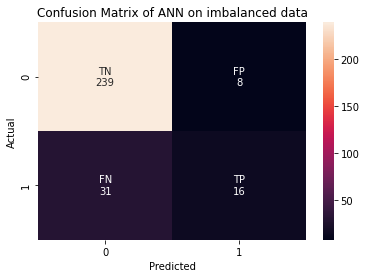

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in nn_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nn_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of ANN on imbalanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM ANN Imbalanced.jpg")
plt.show()

In [ ]:
evaluation_scores_NN = {}
evaluation_scores_NN["Accuracy"] = round(accuracy_score(y_test, NN_pred),3)
evaluation_scores_NN["F1"] = round(f1_score(y_test,NN_pred),3)
evaluation_scores_NN["Precision"] = round(precision_score(y_test, NN_pred),3)
evaluation_scores_NN["Recall"] = round(recall_score(y_test, NN_pred),3)
print(evaluation_scores_NN)

{'Accuracy': 0.867, 'F1': 0.451, 'Precision': 0.667, 'Recall': 0.34}


All scores for the imbalanced models bundled

In [ ]:
scores_dict_imbalanced = {}
scores_dict_imbalanced["KNN"] = evaluation_scores_KNN
scores_dict_imbalanced["SVM"] = evaluation_scores_SVM
scores_dict_imbalanced["RF"] = evaluation_scores_RF
scores_dict_imbalanced["NN"] = evaluation_scores_NN

pd.DataFrame.from_dict(scores_dict_imbalanced).T

,Accuracy,F1,Precision,Recall
KNN,0.840,0.299,0.500,0.213
SVM,0.884,0.528,0.760,0.404
RF,0.854,0.338,0.611,0.234
NN,0.867,0.451,0.667,0.340


Plot of evaluation scores of all models on imbalanced dataset

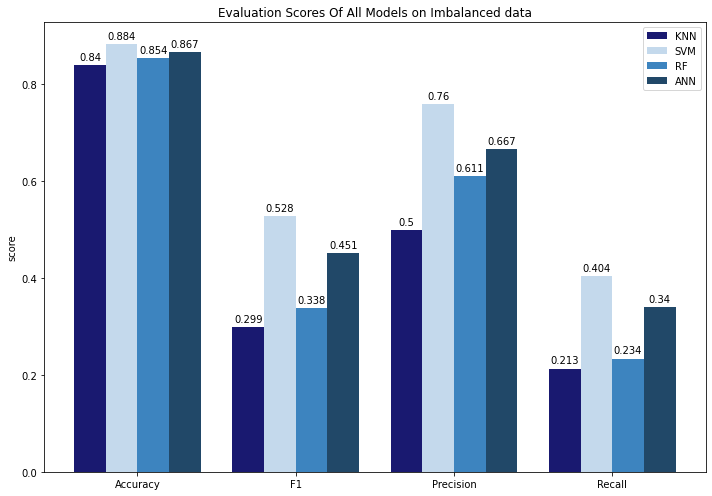

In [ ]:
barWidth = 0.2
 
# set height of bar
metrics = list(evaluation_scores_KNN.keys())
values_knn = list(evaluation_scores_KNN.values())
values_svm = list(evaluation_scores_SVM.values())
values_rf = list(evaluation_scores_RF.values())
values_nn = list(evaluation_scores_NN.values())

 
# Set position of bar on X axis
v1 = np.arange(len(values_knn))
v2 = [x + barWidth for x in v1]
v3 = [x + barWidth for x in v2]
v4 = [x + barWidth for x in v3]



# Make the plot
fig, ax = plt.subplots(1,1, figsize = (10,7))
rects1 = ax.bar(v1, values_knn, color='midnightblue', width =barWidth, label='KNN')
rects2 = ax.bar(v2 , values_svm, color='#c4d9ec', width = barWidth, label='SVM')
rects3 = ax.bar(v3, values_rf, color = "#3d84bf", width = barWidth, label = "RF")
rects4 = ax.bar(v4, values_nn, color = "#214868", width = barWidth, label = "ANN")

 
# Add ticks, labels, and title
ax.set_ylabel('score')
ax.set_title('Evaluation Scores Of All Models on Imbalanced data')
ax.set_xticks((v1+v2+v3+v4)/4)
ax.set_xticklabels(metrics)
ax.legend()
 
# Put values on top of bars: 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/ Evaluation plot Imbalanced data.jpg")
plt.show()

***MODELS ON EQUALLY BALANCED DATA WITH SMOTE***

*KNN*

In [ ]:
#knn met gridsearch van parameters en cross validation
random.seed(666)
KNN_sm = KNeighborsClassifier()
param_grid= {'n_neighbors': [3,5,7,9,11,13,15,17,19]}
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_knn_sm = GridSearchCV(KNN_sm, param_grid, cv = 10, scoring = metrics, refit = 'f1', return_train_score= True)

In [ ]:
random.seed(666)
gscv_knn_sm.fit(X_sm_train, y_sm_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
scores_KNN_sm = pd.DataFrame(gscv_knn_sm.cv_results_)
meanscores_knn_sm = scores_KNN_sm[['params',"mean_test_accuracy", 'mean_train_accuracy','mean_test_f1', 'mean_train_f1','mean_test_recall', 'mean_train_recall',
                             'mean_test_precision', "mean_train_precision","mean_test_roc_auc", 'mean_train_roc_auc', 
                           'rank_test_accuracy', 'rank_test_f1', 'rank_test_recall', 'rank_test_precision', 'rank_test_roc_auc']]
meanscores_knn_sm.T

,0,1,2,3,4,5,6,7,8
params,{'n_neighbors': 3},{'n_neighbors': 5},{'n_neighbors': 7},{'n_neighbors': 9},{'n_neighbors': 11},{'n_neighbors': 13},{'n_neighbors': 15},{'n_neighbors': 17},{'n_neighbors': 19}
mean_test_accuracy,0.919364,0.915826,0.910742,0.916326,0.915303,0.909732,0.908714,0.901108,0.899077
mean_train_accuracy,0.950868,0.947262,0.936106,0.933176,0.930809,0.928386,0.924329,0.919822,0.914469
mean_test_f1,0.917981,0.91456,0.909758,0.91482,0.913864,0.908569,0.907658,0.900104,0.89809
mean_train_f1,0.949998,0.94654,0.935092,0.931815,0.929397,0.927144,0.922966,0.918436,0.91327
mean_test_recall,0.903669,0.90167,0.90067,0.89866,0.89866,0.897671,0.89764,0.891558,0.890548
mean_train_recall,0.933513,0.93374,0.920442,0.91323,0.91075,0.911314,0.906581,0.90275,0.900608
mean_test_precision,0.933206,0.928217,0.919432,0.932127,0.930204,0.920328,0.918542,0.909572,0.906551
mean_train_precision,0.967088,0.959702,0.950221,0.951185,0.948835,0.943543,0.939964,0.934698,0.926312
mean_test_roc_auc,0.957881,0.967281,0.969337,0.968979,0.968084,0.967199,0.965155,0.964082,0.963468


In [ ]:
gscv_knn_sm.best_params_

{'n_neighbors': 3}

In [ ]:
#do the final prediction with the best chosen model
KNN_sm_pred = gscv_knn_sm.predict(X_sm_test)

In [ ]:
print(classification_report(y_sm_test, KNN_sm_pred))
knn_sm_cm = confusion_matrix(y_sm_test, KNN_sm_pred)
print(knn_sm_cm)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       247
           1       0.95      0.91      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

[[234  13]
 [ 23 224]]


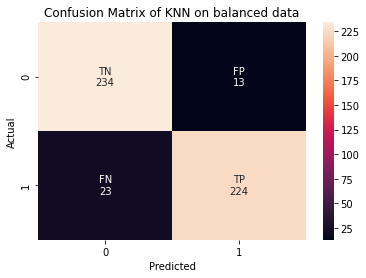

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in knn_sm_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_sm_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of KNN on balanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM KNN Balanced.jpg")
plt.show()

In [ ]:
evaluation_scores_KNN_sm = {}
evaluation_scores_KNN_sm["Accuracy"] = round(accuracy_score(y_sm_test, KNN_sm_pred),3)
evaluation_scores_KNN_sm["F1"] = round(f1_score(y_sm_test,KNN_sm_pred),3)
evaluation_scores_KNN_sm["Precision"] = round(precision_score(y_sm_test, KNN_sm_pred),3)
evaluation_scores_KNN_sm["Recall"] = round(recall_score(y_sm_test, KNN_sm_pred),3)
print(evaluation_scores_KNN_sm)

{'Accuracy': 0.927, 'F1': 0.926, 'Precision': 0.945, 'Recall': 0.907}


In [ ]:
#here you can see that the phenomena of the minority class is tackled, resulting in higher f1 scores that come closer to the accuracy scores, so balanced classes have an effect

SVM

In [ ]:
SVM_sm = svm.SVC(random_state= 666, verbose = 0)
param_grid= {"C":[0.001, 0.01, 0.1, 1,10],
             "kernel": ["linear","poly", "rbf", "sigmoid"],
             "degree": [2,3],
             "gamma": [0.001, 0.01, 0.1, 1,10]}
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_svm_sm = GridSearchCV(SVM_sm, param_grid, cv = 10, scoring = metrics, refit = 'f1', return_train_score= True)

In [ ]:
random.seed(666)
gscv_svm_sm.fit(X_sm_train, y_sm_train)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=666, shrinking=True,
                           tol=0.001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
scores_SVM_sm = pd.DataFrame(gscv_svm_sm.cv_results_)
meanscores_svm_sm = scores_SVM_sm[['params',"mean_test_accuracy", 'mean_train_accuracy','mean_test_f1', 'mean_train_f1','mean_test_recall', 'mean_train_recall',
                             'mean_test_precision', "mean_train_precision","mean_test_roc_auc", 'mean_train_roc_auc', 
                           'rank_test_accuracy', 'rank_test_f1', 'rank_test_recall', 'rank_test_precision', 'rank_test_roc_auc']]
meanscores_svm_sm.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
params,"{'C': 0.001, 'degree': 2, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 2, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 2, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 2, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 2, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 2, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 3, 'gamma': 0.001, 'ker...","{'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kern...","{'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kerne...","{'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 3, 'gamma': 1, 'kernel'...","{'C': 0.001, 'degree': 3, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 3, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 3, 'gamma': 10, 'kernel...","{'C': 0.001, 'degree': 3, 'gamma': 10, 'kernel...",...,"{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': '...","{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': '...","{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': '...","{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': '...","{'C': 10, 'degree': 2, 'gamma': 10, 'kernel': ...","{'C': 10, 'degree': 2, 'gamma': 10, 'kernel': ...","{'C': 10, 'degree': 2, 'gamma': 10, 'kernel': ...","{'C': 10, 'degree': 2, 'gamma': 10, 'kernel': ...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 3, 'gamma': 0.001, 'kernel...","{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel'...","{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel':...","{'C': 10, 'degree': 3

In [ ]:
gscv_svm_sm.best_params_ #linear kernel does not have params degree and gamma,
#check below with only linear kernel and parameter C if it generates the same result

{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
SVM_sm_pred = gscv_svm_sm.predict(X_sm_test)

In [ ]:
print(classification_report(y_sm_test, SVM_sm_pred))
svm_sm_cm = confusion_matrix(y_sm_test, SVM_sm_pred)
print(svm_sm_cm)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.96      0.85      0.91       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494

[[239   8]
 [ 36 211]]


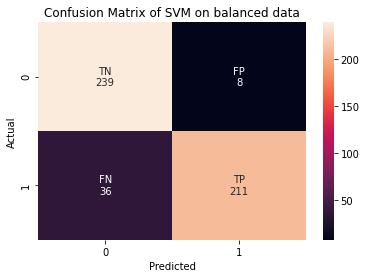

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in svm_sm_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_sm_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of SVM on balanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM SVM Balanced.jpg")
plt.show()

In [ ]:
evaluation_scores_SVM_sm = {}
evaluation_scores_SVM_sm["Accuracy"] = round(accuracy_score(y_sm_test, SVM_sm_pred),3)
evaluation_scores_SVM_sm["F1"] = round(f1_score(y_sm_test,SVM_sm_pred),3)
evaluation_scores_SVM_sm["Precision"] = round(precision_score(y_sm_test, SVM_sm_pred),3)
evaluation_scores_SVM_sm["Recall"] = round(recall_score(y_sm_test, SVM_sm_pred),3)
print(evaluation_scores_SVM_sm)

{'Accuracy': 0.911, 'F1': 0.906, 'Precision': 0.963, 'Recall': 0.854}


Check Linear seperately to see if the above result is correct:

*Linear SVM*

In [ ]:
SVM_sm_linear = svm.SVC(kernel = 'linear', random_state= 666)
param_grid= {"C":[0.001, 0.01, 0.1, 1,10]}
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_svm_sm_linear = GridSearchCV(SVM_sm_linear, param_grid, cv = 10, scoring = metrics, refit = 'f1', return_train_score= True)

In [ ]:
random.seed(666)
gscv_svm_sm_linear.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=666, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
scores_SVM_sm_linear = pd.DataFrame(gscv_svm_sm_linear.cv_results_)
meanscores_svm_sm_linear = scores_SVM_sm_linear[['params',"mean_test_accuracy", 'mean_train_accuracy','mean_test_f1', 'mean_train_f1','mean_test_recall', 'mean_train_recall',
                             'mean_test_precision', "mean_train_precision","mean_test_roc_auc", 'mean_train_roc_auc', 
                           'rank_test_accuracy', 'rank_test_f1', 'rank_test_recall', 'rank_test_precision', 'rank_test_roc_auc']]
meanscores_svm_sm_linear.T

,0,1,2,3,4
params,{'C': 0.001},{'C': 0.01},{'C': 0.1},{'C': 1},{'C': 10}
mean_test_accuracy,0.891453,0.907196,0.922412,0.924448,0.928503
mean_train_accuracy,0.891706,0.910131,0.926527,0.937965,0.941402
mean_test_f1,0.883844,0.898177,0.915962,0.920519,0.925365
mean_train_f1,0.88413,0.901729,0.921075,0.935055,0.939006
mean_test_recall,0.827644,0.821604,0.84898,0.877396,0.887508
mean_train_recall,0.826347,0.824657,0.857562,0.893171,0.902187
mean_test_precision,0.948994,0.991683,0.995305,0.969066,0.967605
mean_train_precision,0.950615,0.994701,0.994781,0.981096,0.978978
mean_test_roc_auc,0.954919,0.968092,0.971044,0.969768,0.969819


In [ ]:
gscv_svm_sm_linear.best_params_

{'C': 10}

In [ ]:
SVM_sm_linear_pred = gscv_svm_sm_linear.predict(X_sm_test)

In [ ]:
print(classification_report(y_sm_test, SVM_sm_linear_pred))
svm_sm_linear_cm = confusion_matrix(y_sm_test, SVM_sm_linear_pred)
print(svm_sm_linear_cm)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.96      0.85      0.91       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494

[[239   8]
 [ 36 211]]


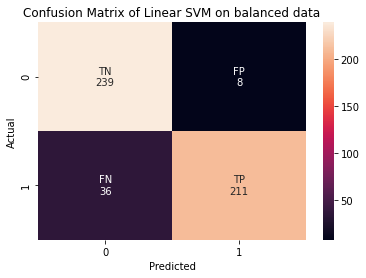

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in svm_sm_linear_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_sm_linear_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of Linear SVM on balanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM Linear SVM Balanced.jpg")
plt.show()

In [ ]:
evaluation_scores_SVM_sm_linear = {}
evaluation_scores_SVM_sm_linear["Accuracy"] = round(accuracy_score(y_sm_test, SVM_sm_linear_pred),3)
evaluation_scores_SVM_sm_linear["F1"] = round(f1_score(y_sm_test,SVM_sm_linear_pred),3)
evaluation_scores_SVM_sm_linear["Precision"] = round(precision_score(y_sm_test, SVM_sm_linear_pred),3)
evaluation_scores_SVM_sm_linear["Recall"] = round(recall_score(y_sm_test, SVM_sm_linear_pred),3)
print(evaluation_scores_SVM_sm_linear)

{'Accuracy': 0.911, 'F1': 0.906, 'Precision': 0.963, 'Recall': 0.854}


*Random Forest*

In [ ]:
# Randomforest met gridsearch en crossvalidation
RF_sm = RandomForestClassifier(random_state= 666)
param_grid= {'n_estimators': [10,20,50,100,200],
             'max_depth': [5,10,15,20,25,30],
             "max_features": [5,6,7,8,9]} 
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

gscv_rf_sm = GridSearchCV(RF_sm, param_grid, cv = 10, scoring = metrics , refit = 'f1', return_train_score= True)
gscv_rf_sm.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=666,
                                

In [ ]:
scores_RF_sm = pd.DataFrame(gscv_rf_sm.cv_results_)

In [ ]:
meanscores_RF_sm = scores_RF_sm[['params',"mean_test_accuracy", 'mean_train_accuracy','mean_test_f1', 'mean_train_f1','mean_test_recall', 'mean_train_recall',
                             'mean_test_precision', "mean_train_precision","mean_test_roc_auc", 'mean_train_roc_auc', 
                           'rank_test_accuracy', 'rank_test_f1', 'rank_test_recall', 'rank_test_precision', 'rank_test_roc_auc']]
meanscores_RF_sm.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
params,"{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 5, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 6, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 7, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 8, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 5, 'max_features': 9, 'n_estimat...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 5, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 6, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...","{'max_depth': 10, 'max_features': 7, 'n_estima...",...,"{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 7, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 8, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 25, 'max_features': 9, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 5, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 6, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 7, 'n_estima...","{'max_depth': 30, 'max_features': 8, 'n_estima...","{'max_depth': 30, 'ma

In [ ]:
gscv_rf_sm.best_params_

{'max_depth': 20, 'max_features': 7, 'n_estimators': 200}

In [ ]:
RF_sm_pred = gscv_rf_sm.predict(X_sm_test)

In [ ]:
print(classification_report(y_sm_test, RF_sm_pred))
rf_sm_cm = confusion_matrix(y_sm_test, RF_sm_pred)
print(rf_sm_cm)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       247
           1       0.99      0.87      0.93       247

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.94      0.93      0.93       494

[[245   2]
 [ 31 216]]


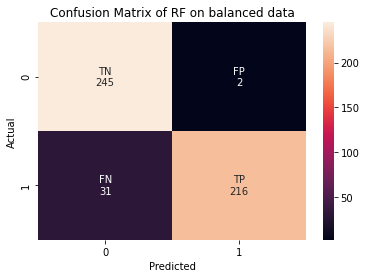

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in rf_sm_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_sm_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of RF on balanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM RF Balanced.jpg")
plt.show()

In [ ]:
evaluation_scores_RF_sm = {}
evaluation_scores_RF_sm["Accuracy"] = round(accuracy_score(y_sm_test, RF_sm_pred),3)
evaluation_scores_RF_sm["F1"] = round(f1_score(y_sm_test,RF_sm_pred),3)
evaluation_scores_RF_sm["Precision"] = round(precision_score(y_sm_test, RF_sm_pred),3)
evaluation_scores_RF_sm["Recall"] = round(recall_score(y_sm_test, RF_sm_pred),3)
print(evaluation_scores_RF_sm)

{'Accuracy': 0.933, 'F1': 0.929, 'Precision': 0.991, 'Recall': 0.874}


Feed Forward Neural Network With One Hidden Layer

In [ ]:
def create_nn_balanced(optimizer = 'adam', hidden_nodes = 33):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
	# create the empty model
  model = Sequential()
  model.add(Dense(hidden_nodes, activation= 'relu'))
  model.add(Dense(1, activation='sigmoid')) #last activation function is sigmoid because of binary classification
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy']) #binary crossentropy because of binary classification
  return model

Focus of number of nodes first

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_1 = KerasClassifier(build_fn=create_nn_balanced, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32],
              'epochs':[15] ,
              'hidden_nodes': list(range(15,34)),
              'optimizer': ['adam']}
gscv_nn_sm_1 = GridSearchCV(estimator= NN_sm_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_1.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb831735b90>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_1.best_params_)
print(gscv_nn_sm_1.best_score_)

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'optimizer': 'adam'}
0.9101551903252739


Try batch size 64

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_1_2 = KerasClassifier(build_fn=create_nn_balanced, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64],
              'epochs':[15] ,
              'hidden_nodes': list(range(15,34)),
              'optimizer': ['adam']}
gscv_nn_sm_1_2 = GridSearchCV(estimator= NN_sm_1_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_1_2.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb824732cd0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_1_2.best_params_)
print(gscv_nn_sm_1_2.best_score_) #not better than first tryout

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 32, 'optimizer': 'adam'}
0.900380330397551


Try batch size 128

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_1_3 = KerasClassifier(build_fn=create_nn_balanced, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[128],
              'epochs':[15] ,
              'hidden_nodes': list(range(15,34)),
              'optimizer': ['adam']}
gscv_nn_sm_1_3 = GridSearchCV(estimator= NN_sm_1_3, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_1_3.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb831152ad0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [128], 'epochs': [15],
                         'hidden_nodes': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29, 30, 31, 32,
                                          33],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_1_3.best_params_)
print(gscv_nn_sm_1_3.best_score_)  #not better

{'batch_size': 128, 'epochs': 15, 'hidden_nodes': 31, 'optimizer': 'adam'}
0.8903376414134037


*Feed Forward Neural Network With Two Hidden Layers*

In [ ]:
def create_nn_balanced_2(optimizer = "adam", hidden_nodes = 24, hidden_nodes_2 = 16):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
  #create the empty model
  model = Sequential()
  model.add(Dense(hidden_nodes, activation= 'relu'))
  model.add(Dense(hidden_nodes_2, activation = 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  #compile model
  model.compile(loss= 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

Focus on hidden nodes first

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_2_1 = KerasClassifier(build_fn=create_nn_balanced_2, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], #based on tryouts with one hidden layer
              'epochs':[15] ,
              'hidden_nodes': [24], #based on tryouts with one hidden layer, this was the bast
              'hidden_nodes_2':list(range(10,25)), #same or lower as first hidden node
              'optimizer': ['adam']}
gscv_nn_sm_2_1 = GridSearchCV(estimator= NN_sm_2_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_2_1.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb831814a50>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24],
                         'hidden_nodes_2': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                            19, 20, 21, 22, 23, 24],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_2_1.best_params_)
print(gscv_nn_sm_2_1.best_score_) # better than one hidden layer neural network

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 14, 'optimizer': 'adam'}
0.9178894971886737


Try with batch size 64

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_2_2 = KerasClassifier(build_fn=create_nn_balanced_2, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], #based on tryouts with one hidden layer
              'epochs':[15] ,
              'hidden_nodes': [24], #based on tryouts with one hidden layer, this was the bast
              'hidden_nodes_2':list(range(10,25)), #same or lower as first hidden node
              'optimizer': ['adam']}
gscv_nn_sm_2_2 = GridSearchCV(estimator= NN_sm_2_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_2_2.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb82faa3650>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24],
                         'hidden_nodes_2': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                            19, 20, 21, 22, 23, 24],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_2_2.best_params_)
print(gscv_nn_sm_2_2.best_score_) #not better

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 23, 'optimizer': 'adam'}
0.9151384230595552


Try with batch size 128

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_2_3 = KerasClassifier(build_fn=create_nn_balanced_2, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[128], #based on tryouts with one hidden layer
              'epochs':[15] ,
              'hidden_nodes': [24], #based on tryouts with one hidden layer, this was the bast
              'hidden_nodes_2':list(range(10,25)), #same or lower as first hidden node
              'optimizer': ['adam']}
gscv_nn_sm_2_3 = GridSearchCV(estimator= NN_sm_2_3, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_2_3.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb831882350>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [128], 'epochs': [15],
                         'hidden_nodes': [24],
                         'hidden_nodes_2': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                            19, 20, 21, 22, 23, 24],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_2_3.best_params_)
print(gscv_nn_sm_2_3.best_score_) #not better

{'batch_size': 128, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 19, 'optimizer': 'adam'}
0.9096233089128256


Try with different hidden nodes in the first layer

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_2_4 = KerasClassifier(build_fn=create_nn_balanced_2, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], #based on tryouts with one hidden layer and two hidden layer
              'epochs':[15] ,
              'hidden_nodes': list(range(23,34)), 
              'hidden_nodes_2':list(range(10,24)), #same or lower as first hidden node
              'optimizer': ['adam']}
gscv_nn_sm_2_4 = GridSearchCV(estimator= NN_sm_2_4, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_2_4.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09d292ed50>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [23, 24, 25, 26, 27, 28, 29, 30, 31,
                                          32, 33],
                         'hidden_nodes_2': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                            19, 20, 21, 22, 23],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_2_4.best_params_)
print(gscv_nn_sm_2_4.best_score_)

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 28, 'hidden_nodes_2': 12, 'optimizer': 'adam'}
0.918614444231312


Try with best model from above with batch size 64

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_2_5 = KerasClassifier(build_fn=create_nn_balanced_2, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], #based on tryouts with one hidden layer and two hidden layer
              'epochs':[15] ,
              'hidden_nodes': [28], 
              'hidden_nodes_2':[12], #same or lower as first hidden node
              'optimizer': ['adam']}
gscv_nn_sm_2_5 = GridSearchCV(estimator= NN_sm_2_5, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_2_5.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09d1f7fc10>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [28], 'hidden_nodes_2': [12],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_2_5.best_params_)
print(gscv_nn_sm_2_5.best_score_)#not better

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 28, 'hidden_nodes_2': 12, 'optimizer': 'adam'}
0.9109516558581134


Try all kinds of nodes with batch size 64 to see if performance increases

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_2_6 = KerasClassifier(build_fn=create_nn_balanced_2, verbose=0)
# define the grid search parameters
#hidden_nodes is best inbetween the size of the input layer and output layer
metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], 
              'epochs':[15] ,
              'hidden_nodes': list(range(23,34)), 
              'hidden_nodes_2':list(range(10,24)), #same or lower as first hidden node
              'optimizer': ['adam']}
gscv_nn_sm_2_6 = GridSearchCV(estimator= NN_sm_2_6, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_2_6.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09d1f7f890>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [23, 24, 25, 26, 27, 28, 29, 30, 31,
                                          32, 33],
                         'hidden_nodes_2': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                            19, 20, 21, 22, 23],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_2_6.best_params_)
print(gscv_nn_sm_2_6.best_score_) #overall best model

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 33, 'hidden_nodes_2': 22, 'optimizer': 'adam'}
0.9195949107077969


*Feed Forward Neural Network with Three Hidden Layers*

In [ ]:
def create_nn_balanced_3(optimizer = "adam", hidden_nodes = 33, hidden_nodes_2 = 12, hidden_nodes_3 = 9):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
  #create the empty model
  model = Sequential()
  model.add(Dense(hidden_nodes, activation= 'relu'))
  model.add(Dense(hidden_nodes_2, activation = 'relu'))
  model.add(Dense(hidden_nodes_3, activation = 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  #compile model
  model.compile(loss= 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

Focus on hidden nodes first

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_3_1 = KerasClassifier(build_fn=create_nn_balanced_3, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32,64], #came out as best
              'epochs':[15] , 
              'hidden_nodes': [24,28,33], #came out as best options
              'hidden_nodes_2':[12,14,22,24], #came out as best options based on two hidden layer
              'hidden_nodes_3': [6,9,12,15],
              'optimizer':['adam']}
gscv_nn_sm_3_1 = GridSearchCV(estimator= NN_sm_3_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_3_1.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09c79c2c90>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'epochs': [15],
                         'hidden_nodes': [24, 28, 33],
                         'hidden_nodes_2': [12, 14, 22, 24],
                         'hidden_nodes_3': [6, 9, 12, 15],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_3_1.best_params_)
print(gscv_nn_sm_3_1.best_score_)

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 14, 'hidden_nodes_3': 9, 'optimizer': 'adam'}
0.9209455944853928


Try with different parameters to see if it makes a difference

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_3_2 = KerasClassifier(build_fn=create_nn_balanced_3, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], #came out as best above
              'epochs':[15] , 
              'hidden_nodes': [24,28,33], #came out as best options
              'hidden_nodes_2':[12,14,22,24], #came out as best options based on two hidden layer
              'hidden_nodes_3': [6,7,8,9,10,11,12,13,14],
              'optimizer':['adam']}
gscv_nn_sm_3_2 = GridSearchCV(estimator= NN_sm_3_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_3_2.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09c7975a10>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24, 28, 33],
                         'hidden_nodes_2': [12, 14, 22, 24],
                         'hidden_nodes_3': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_3_2.best_params_)
print(gscv_nn_sm_3_2.best_score_) #same results as obove

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 14, 'hidden_nodes_3': 9, 'optimizer': 'adam'}
0.9209455944853928


Try this best result with batch size 64

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_3_3 = KerasClassifier(build_fn=create_nn_balanced_3, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], 
              'epochs':[15] , 
              'hidden_nodes': [24], 
              'hidden_nodes_2':[14], 
              'hidden_nodes_3': [9],
              'optimizer':['adam']}
gscv_nn_sm_3_3 = GridSearchCV(estimator= NN_sm_3_3, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_3_3.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09c78f87d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24], 'hidden_nodes_2': [14],
                         'hidden_nodes_3': [9], 'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_3_3.best_params_)
print(gscv_nn_sm_3_3.best_score_) # not better

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 14, 'hidden_nodes_3': 9, 'optimizer': 'adam'}
0.910611718222993


Try random other numbers in the hidden nodes to see if it performs better

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_3_4 = KerasClassifier(build_fn=create_nn_balanced_3, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32,64], 
              'epochs':[15] , 
              'hidden_nodes': [23,25,27,33], 
              'hidden_nodes_2':[13,15,17,23,26], 
              'hidden_nodes_3': [7,9,11,13,15],
              'optimizer':['adam']}
gscv_nn_sm_3_4 = GridSearchCV(estimator= NN_sm_3_4, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_3_4.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09cd4b0590>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'epochs': [15],
                         'hidden_nodes': [23, 25, 27, 33],
                         'hidden_nodes_2': [13, 15, 17, 23, 26],
                         'hidden_nodes_3': [7, 9, 11, 13, 15],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_3_4.best_params_)
print(gscv_nn_sm_3_4.best_score_) #not better

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 33, 'hidden_nodes_2': 15, 'hidden_nodes_3': 13, 'optimizer': 'adam'}
0.9192060311355361


Jump to Five hidden layer Neural Network

In [ ]:
def create_nn_balanced_5(optimizer = "adam", hidden_nodes = 33, hidden_nodes_2 = 24, hidden_nodes_3 = 9, hidden_nodes_4 = 9, hidden_nodes_5 = 6):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
  #create the empty model
  model = Sequential()
  model.add(Dense(hidden_nodes, activation= 'relu'))
  model.add(Dense(hidden_nodes_2, activation = 'relu'))
  model.add(Dense(hidden_nodes_3, activation = 'relu'))
  model.add(Dense(hidden_nodes_4, activation = 'relu'))
  model.add(Dense(hidden_nodes_5, activation = 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  #compile model
  model.compile(loss= 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_5_1 = KerasClassifier(build_fn=create_nn_balanced_5, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], 
              'epochs':[15] , 
              'hidden_nodes': [24,28,33],#came out as best options 
              'hidden_nodes_2':[12,14,22], #came out as best options 
              'hidden_nodes_3': [9,13], #came out as best options
              'hidden_nodes_4':[3,6,9],
              'hidden_nodes_5': [3,6,9],
              'optimizer':['adam']}
gscv_nn_sm_5_1 = GridSearchCV(estimator= NN_sm_5_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_5_1.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09c78980d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24, 28, 33],
                         'hidden_nodes_2': [12, 14, 22],
                         'hidden_nodes_3': [9, 13], 'hidden_nodes_4': [3, 6, 9],
                         'hidden_nodes_5': [3, 6, 9], 'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_5_1.best_params_)
print(gscv_nn_sm_5_1.best_score_)#not better than 3 layer

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 12, 'hidden_nodes_3': 13, 'hidden_nodes_4': 6, 'hidden_nodes_5': 3, 'optimizer': 'adam'}
0.9185703090053702


Try with batch size 64

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_5_2 = KerasClassifier(build_fn=create_nn_balanced_5, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], 
              'epochs':[15] , 
              'hidden_nodes': [24,28,33],#came out as best options 
              'hidden_nodes_2':[12,14,22], #came out as best options 
              'hidden_nodes_3': [9,12], #came out as best options
              'hidden_nodes_4':[3,6,9],
              'hidden_nodes_5': [3,6,9],
              'optimizer':['adam']}
gscv_nn_sm_5_2 = GridSearchCV(estimator= NN_sm_5_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_5_2.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f09d2040090>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24, 28, 33],
                         'hidden_nodes_2': [12, 14, 22],
                         'hidden_nodes_3': [9, 12], 'hidden_nodes_4': [3, 6, 9],
                         'hidden_nodes_5': [3, 6, 9], 'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_5_2.best_params_)
print(gscv_nn_sm_5_2.best_score_) #not better

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 22, 'hidden_nodes_3': 9, 'hidden_nodes_4': 3, 'hidden_nodes_5': 3, 'optimizer': 'adam'}
0.9200773734211536


Try with different random numbers to see if it performs better

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_5_3 = KerasClassifier(build_fn=create_nn_balanced_5, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], 
              'epochs':[15] , 
              'hidden_nodes': [25,26,27,28],
              'hidden_nodes_2':[13,15,17], 
              'hidden_nodes_3': [8,9,10,11], 
              'hidden_nodes_5': [4,5,6,7],
              'optimizer':['adam']}
gscv_nn_sm_5_3 = GridSearchCV(estimator= NN_sm_5_3, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_5_3.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f841091ecd0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [25, 26, 27, 28],
                         'hidden_nodes_2': [13, 15, 17],
                         'hidden_nodes_3': [8, 9, 10, 11],
                         'hidden_nodes_5': [4, 5, 6, 7],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_5_3.best_params_)
print(gscv_nn_sm_5_3.best_score_) #not better

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 25, 'hidden_nodes_2': 17, 'hidden_nodes_3': 11, 'hidden_nodes_5': 4, 'optimizer': 'adam'}
0.9175989070321625


Go back to 4 hidden layer to see how that performs

In [ ]:
def create_nn_balanced_4(optimizer = "adam", hidden_nodes = 33, hidden_nodes_2 = 12, hidden_nodes_3 = 9, hidden_nodes_4 = 5):
  random.seed(666)
  tensorflow.random.set_seed(666)
  seed(666)
  #create the empty model
  model = Sequential()
  model.add(Dense(hidden_nodes, activation= 'relu'))
  model.add(Dense(hidden_nodes_2, activation = 'relu'))
  model.add(Dense(hidden_nodes_3, activation = 'relu'))
  model.add(Dense(hidden_nodes_4, activation = 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  #compile model
  model.compile(loss= 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
  return model

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_4_1 = KerasClassifier(build_fn=create_nn_balanced_4, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[32], 
              'epochs':[15] , 
              'hidden_nodes': [24,28,33],#came out as best options 
              'hidden_nodes_2':[12,14,22], #came out as best options 
              'hidden_nodes_3': [9,12,15],
              'hidden_nodes_4':[3,5,7,9],
              'optimizer':['adam']}
gscv_nn_sm_4_1 = GridSearchCV(estimator= NN_sm_4_1, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_4_1.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f840bf02150>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32], 'epochs': [15],
                         'hidden_nodes': [24, 28, 33],
                         'hidden_nodes_2': [12, 14, 22],
                         'hidden_nodes_3': [9, 12, 15],
                         'hidden_nodes_4': [3, 5, 7, 9],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_4_1.best_params_)
print(gscv_nn_sm_4_1.best_score_)# not better

{'batch_size': 32, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 12, 'hidden_nodes_3': 12, 'hidden_nodes_4': 7, 'optimizer': 'adam'}
0.9197368948973075


Try with batch size 64

In [ ]:
random.seed(666)
tensorflow.random.set_seed(666)
seed(666)
NN_sm_4_2 = KerasClassifier(build_fn=create_nn_balanced_4, verbose=0)
# define the grid search parameters

metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']
param_grid = {'batch_size':[64], 
              'epochs':[15] , 
              'hidden_nodes': [24,28,33],#came out as best options 
              'hidden_nodes_2':[12,14,22], #came out as best options 
              'hidden_nodes_3': [9,12,15],
              'hidden_nodes_4':[5,7,9],
              'optimizer':['adam']}
gscv_nn_sm_4_2 = GridSearchCV(estimator= NN_sm_4_2, param_grid=param_grid, n_jobs=-1, cv= 10, scoring = metrics, refit = 'f1')
gscv_nn_sm_4_2.fit(X_sm_train, y_sm_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f840bd4f310>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [15],
                         'hidden_nodes': [24, 28, 33],
                         'hidden_nodes_2': [12, 14, 22],
                         'hidden_nodes_3': [9, 12, 15],
                         'hidden_nodes_4': [5, 7, 9], 'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
             verbose=0)

In [ ]:
print(gscv_nn_sm_4_2.best_params_)
print(gscv_nn_sm_4_2.best_score_)#not better

{'batch_size': 64, 'epochs': 15, 'hidden_nodes': 24, 'hidden_nodes_2': 14, 'hidden_nodes_3': 9, 'hidden_nodes_4': 7, 'optimizer': 'adam'}
0.9202057102196489


Predictions and CM of best performing model

In [ ]:
random.seed(666)
NN_sm_pred = gscv_nn_sm_3_2.predict(X_sm_test) #Best model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_sm_test, NN_sm_pred))
nn_sm_cm = confusion_matrix(y_sm_test, NN_sm_pred)
print(nn_sm_cm)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.95      0.85      0.90       247

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494

[[237  10]
 [ 37 210]]


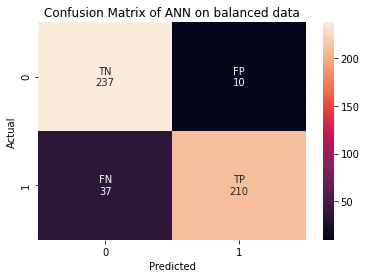

In [ ]:
names = ["TN", "FP", "FN", "TP"]
values = [ "{0:0.0f}".format(value) for value in nn_sm_cm.flatten()]
labels = [f"{name}\n{value}" for name, value, in zip(names,values)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nn_sm_cm, annot = labels, fmt = '')
plt.title("Confusion Matrix of ANN on balanced data")
plt.ylabel("Actual")
plt.xlabel("Predicted")

#images_dir = '/content/drive/MyDrive/Thesis'
#plt.savefig(f"{images_dir}/CM ANN Balanced.jpg")
plt.show()

In [ ]:
evaluation_scores_NN_sm = {}
evaluation_scores_NN_sm["Accuracy"] = round(accuracy_score(y_sm_test, NN_sm_pred),3)
evaluation_scores_NN_sm["F1"] = round(f1_score(y_sm_test,NN_sm_pred),3)
evaluation_scores_NN_sm["Precision"] = round(precision_score(y_sm_test, NN_sm_pred),3)
evaluation_scores_NN_sm["Recall"] = round(recall_score(y_sm_test, NN_sm_pred),3)
print(evaluation_scores_NN_sm)

{'Accuracy': 0.905, 'F1': 0.899, 'Precision': 0.955, 'Recall': 0.85}


All scores for the balanced models bundled

In [ ]:
scores_dict_balanced = {}
scores_dict_balanced["KNN"] = evaluation_scores_KNN_sm
scores_dict_balanced["SVM"] = evaluation_scores_SVM_sm
scores_dict_balanced["RF"] = evaluation_scores_RF_sm
scores_dict_balanced["ANN"] = evaluation_scores_NN_sm
pd.DataFrame.from_dict(scores_dict_balanced).T

,Accuracy,F1,Precision,Recall
KNN,0.927,0.926,0.945,0.907
SVM,0.911,0.906,0.963,0.854
RF,0.933,0.929,0.991,0.874
ANN,0.905,0.899,0.955,0.850


Graph of evaluation scores of all models on balanced data

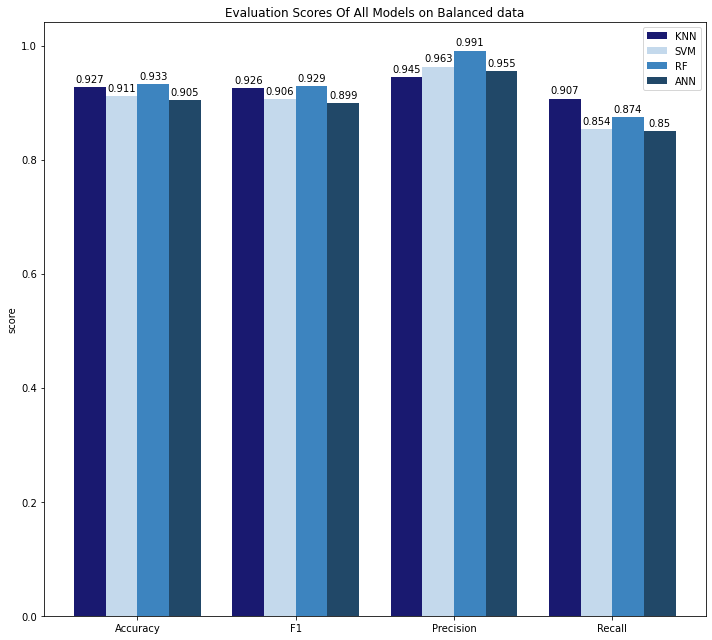

In [ ]:
barWidth = 0.2
 
# set height of bar
metrics = list(evaluation_scores_KNN_sm.keys())
values_knn = list(evaluation_scores_KNN_sm.values())
values_svm = list(evaluation_scores_SVM_sm.values())
values_rf = list(evaluation_scores_RF_sm.values())
values_nn = list(evaluation_scores_NN_sm.values())

 
# Set position of bar on X axis
v1 = np.arange(len(values_knn))
v2 = [x + barWidth for x in v1]
v3 = [x + barWidth for x in v2]
v4 = [x + barWidth for x in v3]



# Make the plot
fig, ax = plt.subplots(1,1, figsize = (10,9))
rects1 = ax.bar(v1, values_knn, color='midnightblue', width =barWidth, label='KNN')
rects2 = ax.bar(v2 , values_svm, color='#c4d9ec', width = barWidth, label='SVM')
rects3 = ax.bar(v3, values_rf, color = "#3d84bf", width = barWidth, label = "RF")
rects4 = ax.bar(v4, values_nn, color = "#214868", width = barWidth, label = "ANN")

 
# Add ticks, labels, and title
ax.set_ylabel('score')
ax.set_title('Evaluation Scores Of All Models on Balanced data')
ax.set_xticks((v1+v2+v3+v4)/4)
ax.set_xticklabels(metrics)
ax.legend()
 
# Put values on top of bars: 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()


images_dir = '/content/drive/MyDrive/Thesis'
plt.savefig(f"{images_dir}/Performance Balanced.jpg")
plt.show()